In [1]:
#Import library and packages:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("whitegrid", {'axes.grid' : False})

# Data Understanding and Cleaning

In [2]:
#Load data and check its basic information
df = pd.read_csv('PFE.csv')
display(df.info(), df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PERMNO   501 non-null    int64  
 1   date     501 non-null    object 
 2   TICKER   501 non-null    object 
 3   COMNAM   501 non-null    object 
 4   BIDLO    501 non-null    float64
 5   ASKHI    501 non-null    float64
 6   PRC      501 non-null    float64
 7   VOL      501 non-null    int64  
 8   RET      501 non-null    float64
 9   BID      501 non-null    float64
 10  ASK      501 non-null    float64
 11  OPENPRC  501 non-null    float64
 12  vwretd   501 non-null    float64
 13  vwretx   501 non-null    float64
 14  ewretd   501 non-null    float64
 15  ewretx   501 non-null    float64
 16  sprtn    501 non-null    float64
dtypes: float64(12), int64(2), object(3)
memory usage: 66.7+ KB


None

PERMNO      date TICKER      COMNAM  BIDLO  ASKHI    PRC       VOL  \
0   21936  2022/1/3    PFE  PFIZER INC  56.34  58.55  56.65  57253148   
1   21936  2022/1/4    PFE  PFIZER INC  53.94  56.43  54.53  66993082   
2   21936  2022/1/5    PFE  PFIZER INC  55.37  56.44  55.63  52956422   
3   21936  2022/1/6    PFE  PFIZER INC  54.49  55.63  54.84  37000392   
4   21936  2022/1/7    PFE  PFIZER INC  54.63  55.77  55.72  27703374   

        RET    BID    ASK  OPENPRC    vwretd    vwretx    ewretd    ewretx  \
0 -0.040643  56.59  56.60    58.50  0.006155  0.006132  0.013300  0.013281   
1 -0.037423  54.53  54.54    56.22 -0.002351 -0.002398 -0.003614 -0.003626   
2  0.020172  55.62  55.63    55.84 -0.021879 -0.021933 -0.022888 -0.022899   
3 -0.014201  54.84  54.85    55.16  0.000161  0.000103 -0.000855 -0.000868   
4  0.016047  55.71  55.72    55.36 -0.004164 -0.004304 -0.003449 -0.003472   

      sprtn  
0  0.006374  
1 -0.000630  
2 -0.019393  
3 -0.000964  
4 -0.004050

In [3]:
df['PERMNO'] = df['PERMNO'].apply(str)

In [4]:
df.isnull().sum()

PERMNO     0
date       0
TICKER     0
COMNAM     0
BIDLO      0
ASKHI      0
PRC        0
VOL        0
RET        0
BID        0
ASK        0
OPENPRC    0
vwretd     0
vwretx     0
ewretd     0
ewretx     0
sprtn      0
dtype: int64

In [5]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df = df.sort_values('date')
df

PERMNO TICKER      COMNAM    BIDLO    ASKHI    PRC       VOL  \
date                                                                      
2022-01-03  21936    PFE  PFIZER INC  56.3400  58.5500  56.65  57253148   
2022-01-04  21936    PFE  PFIZER INC  53.9400  56.4300  54.53  66993082   
2022-01-05  21936    PFE  PFIZER INC  55.3700  56.4400  55.63  52956422   
2022-01-06  21936    PFE  PFIZER INC  54.4900  55.6300  54.84  37000392   
2022-01-07  21936    PFE  PFIZER INC  54.6300  55.7700  55.72  27703374   
...           ...    ...         ...      ...      ...    ...       ...   
2023-12-22  21936    PFE  PFIZER INC  28.1800  28.7900  28.40  35162307   
2023-12-26  21936    PFE  PFIZER INC  28.2500  28.5300  28.41  30119121   
2023-12-27  21936    PFE  PFIZER INC  28.3100  28.7299  28.61  35000664   
2023-12-28  21936    PFE  PFIZER INC  28.5819  29.0300  28.79  30472890   
2023-12-29  21936    PFE  PFIZER INC  28.5400  28.8689  28.79  30363079   

                 RET    BID    ASK  OPENPRC    vwretd    vwretx    ewretd  \
date                                                                        
2022-01-03 -0.040643  56.59  56.60   58.500  0.006155  0.006132  0.013300   
2022-01-04 -0.037423  54.53  54.54   56.220 -0.002351 -0.002398 -0.003614   
2022-01-05  0.020172  55.62  55.63   55.840 -0.021879 -0.021933 -0.022888   
2022-01-06 -0.014201  54.84  54.85   55.160  0.000161  0.000103 -0.000855   
2022-01-07  0.016047  55.71  55.72   55.360 -0.004164 -0.004304 -0.003449   
...              ...    ...    ...      ...       ...       ...       ...   
2023-12-22  0.003179  28.40  28.41   28.440  0.002440  0.002372  0.007676   
2023-12-26  0.000352  28.41  28.42   28.425  0.005218  0.005199  0.009674   
2023-12-27  0.007040  28.63  28.64   28.470  0.001995  0.001807  0.005276   
2023-12-28  0.006292  28.80  28.81   28.610 -0.000108 -0.000295  0.002042   
2023-12-29  0.000000  28.78  28.79   28.780 -0.004045 -0.004084 -0.007480   

              ewretx     sprtn  
date                            
2022-01-03  0.013281  0.006374  
2022-01-04 -0.003626 -0.000630  
2022-01-05 -0.022899 -0.019393  
2022-01-06 -0.000868 -0.000964  
2022-01-07 -0.003472 -0.004050  
...              ...       ...  
2023-12-22  0.007387  0.001660  
2023-12-26  0.009299  0.004232  
2023-12-27  0.004907  0.001430  
2023-12-28  0.001428  0.000370  
2023-12-29 -0.007546 -0.002826  

[501 rows x 16 columns]

# EDA

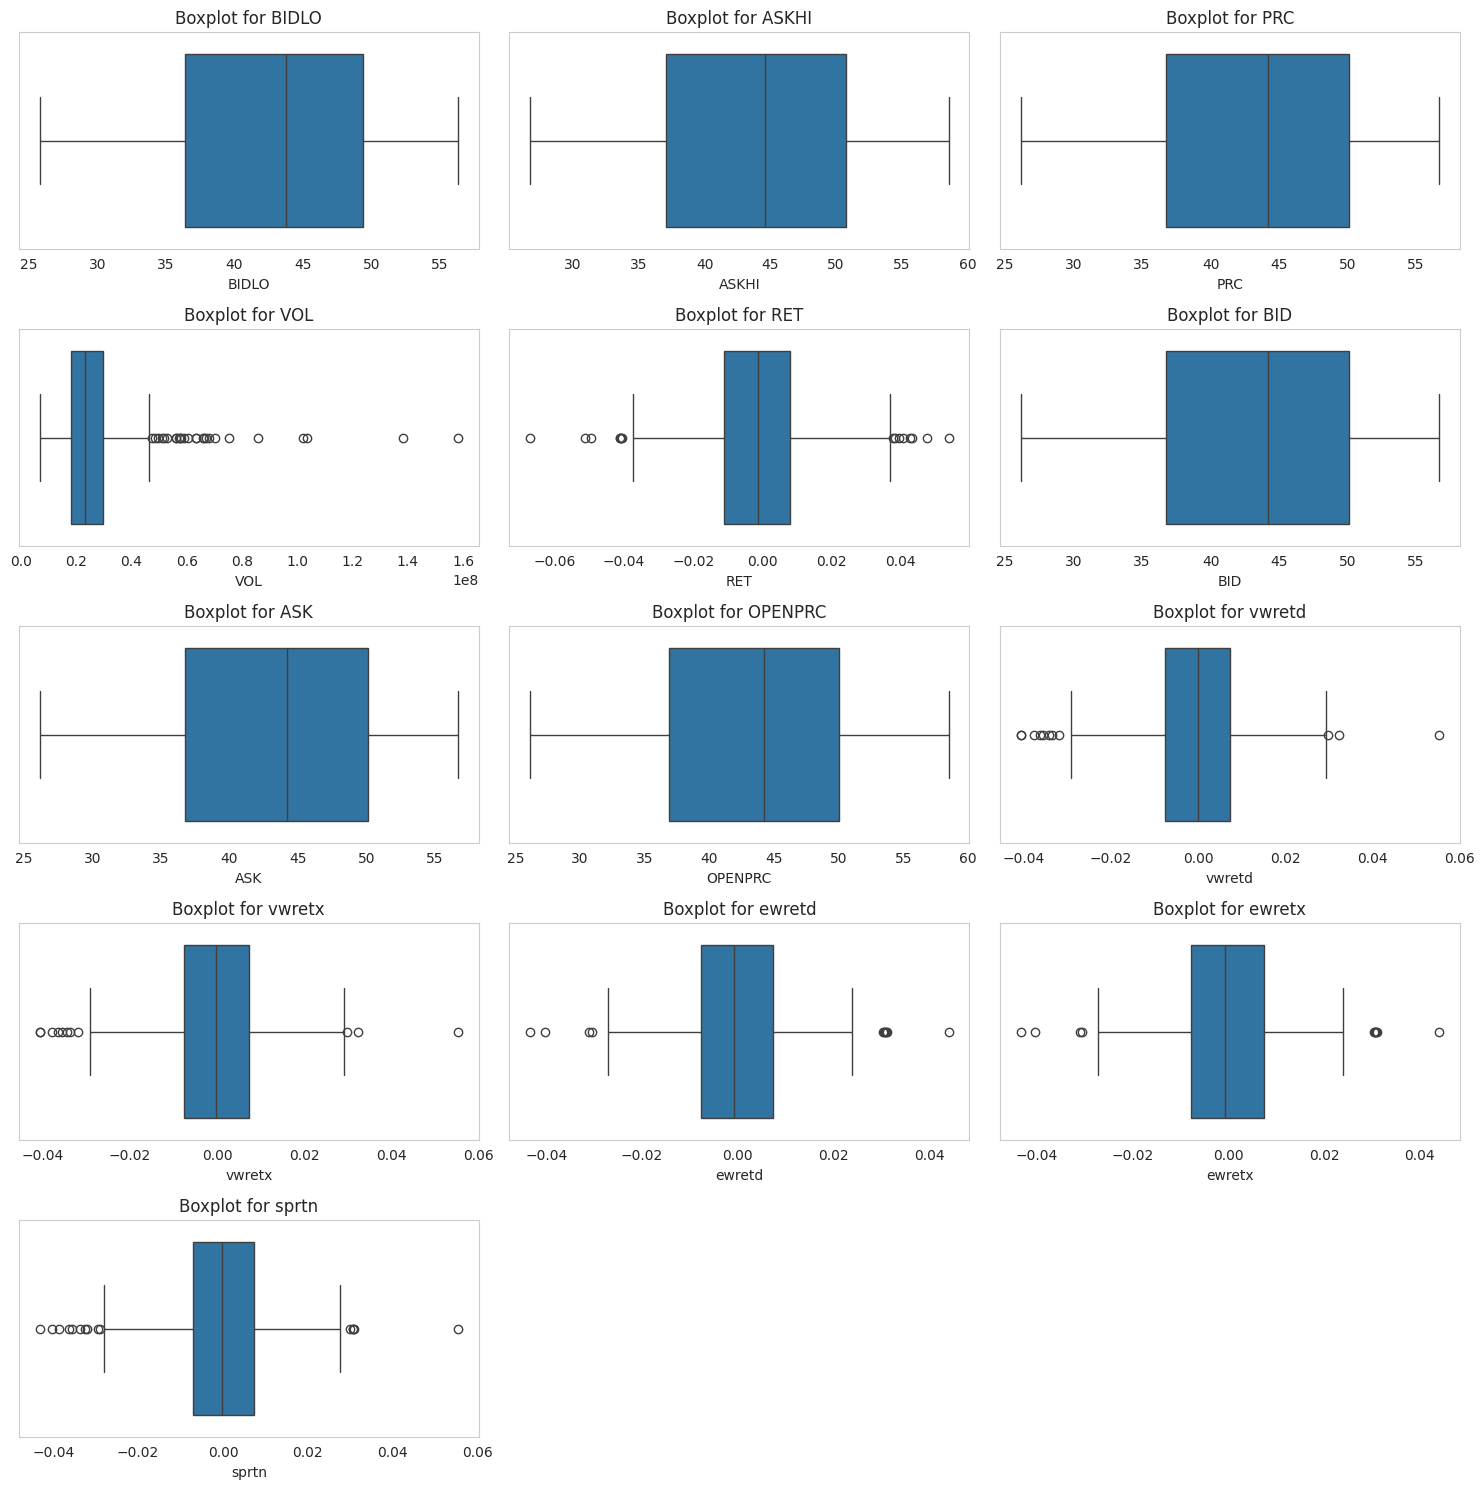

In [6]:
numeric_columns = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(15, 15))

# Iterate through each numerical variable and plot a boxplot
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(5, 3, i)  # 2 rows, 4 columns
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')

plt.tight_layout()
plt.show()

For the features such as trading volume (VOL), return (RET), value-weighted returns (vwretd, vwretx), equal-weighted returns (ewretd), and S&P Composite Index return (sprtrn), there are ouliters that we need to pay attention to.If we check their validity further, we can figure out that,

*   VOL represents the trading volume. The outliers might indicate days of unusually high trading activity.
*   RET represents the return. Outliers might indicate extreme market conditions.
*   value-weighted returns (vwretd, vwretx), equal-weighted returns (ewretd), and S&P Composite Index return (sprtrn) represents the value-weighted return, and the outliers might indicate extreme market conditions.


That's to say, the above abnormal values are consistent with the actual situation.

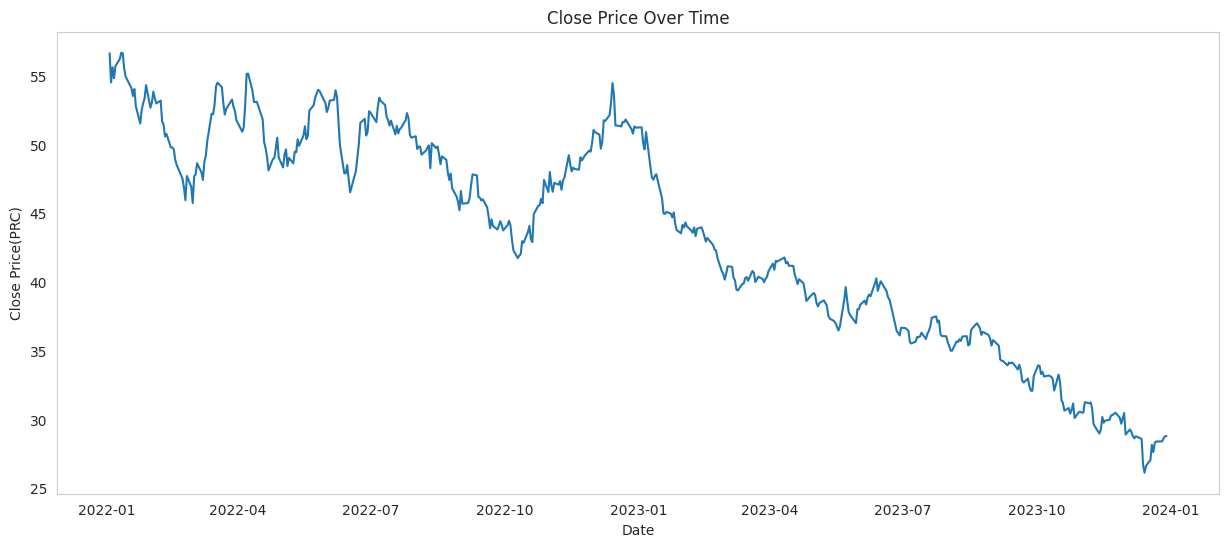

In [7]:
plt.figure(figsize=(15, 6))
plt.plot(df.index, df['PRC'])
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price(PRC)')
plt.show()

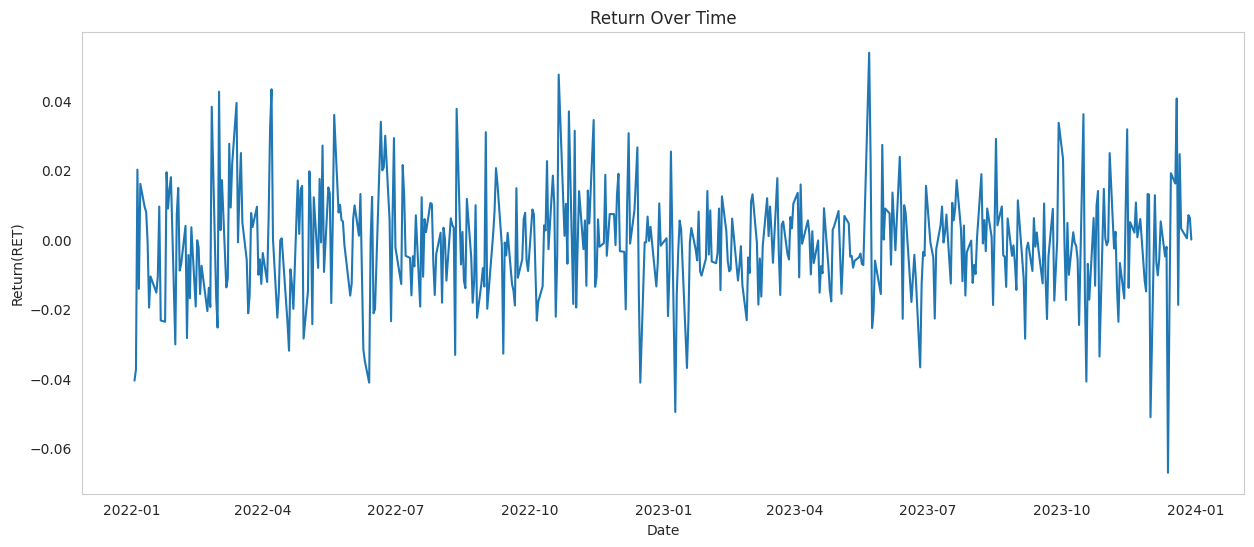

In [8]:
plt.figure(figsize=(15, 6))
plt.plot(df.index, df['RET'])
plt.title('Return Over Time')
plt.xlabel('Date')
plt.ylabel('Return(RET)')
plt.show()

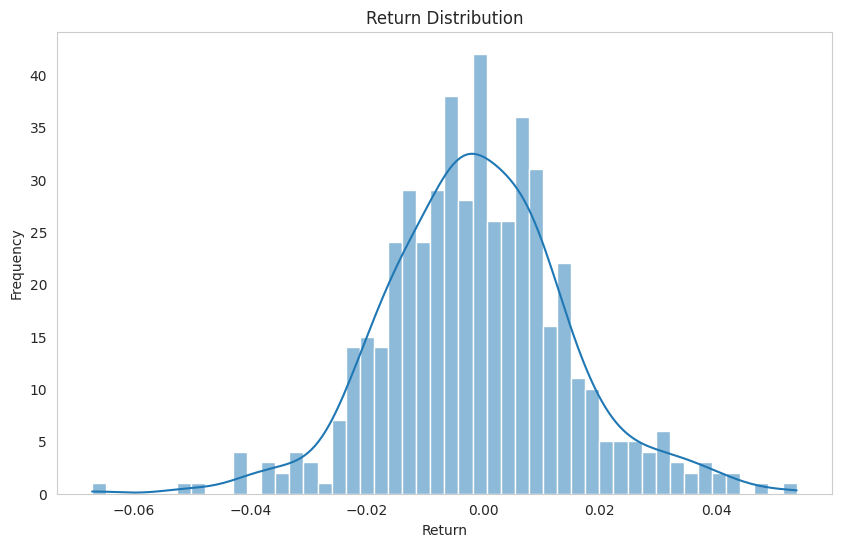

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df['RET'], bins=50, kde=True)
plt.title('Return Distribution')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.show()

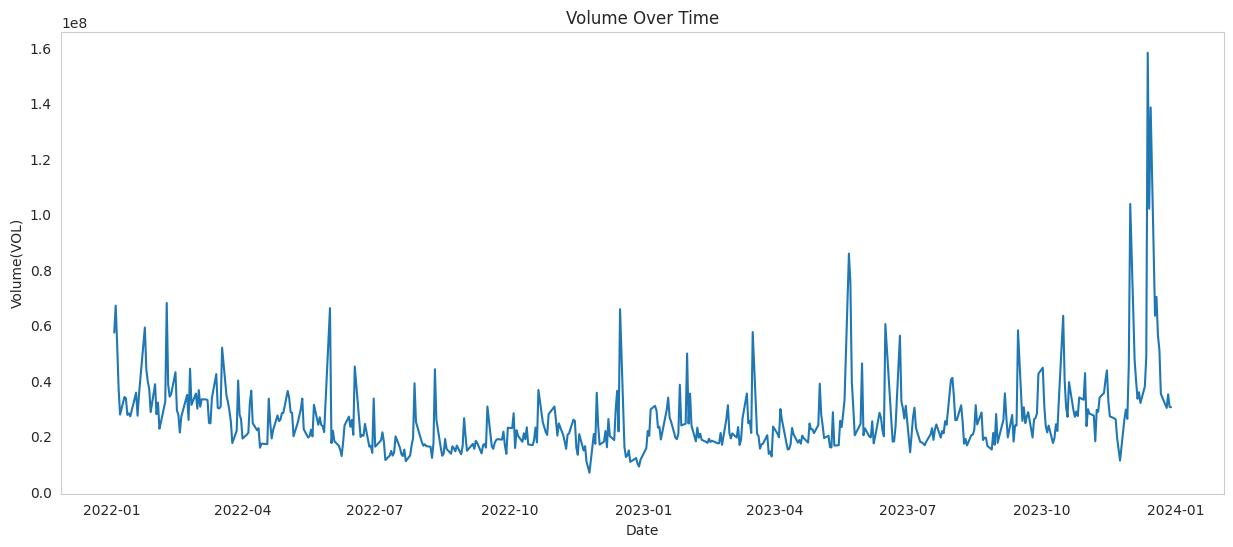

In [10]:
plt.figure(figsize=(15, 6))
plt.plot(df.index, df['VOL'])
plt.title('Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume(VOL)')
plt.show()


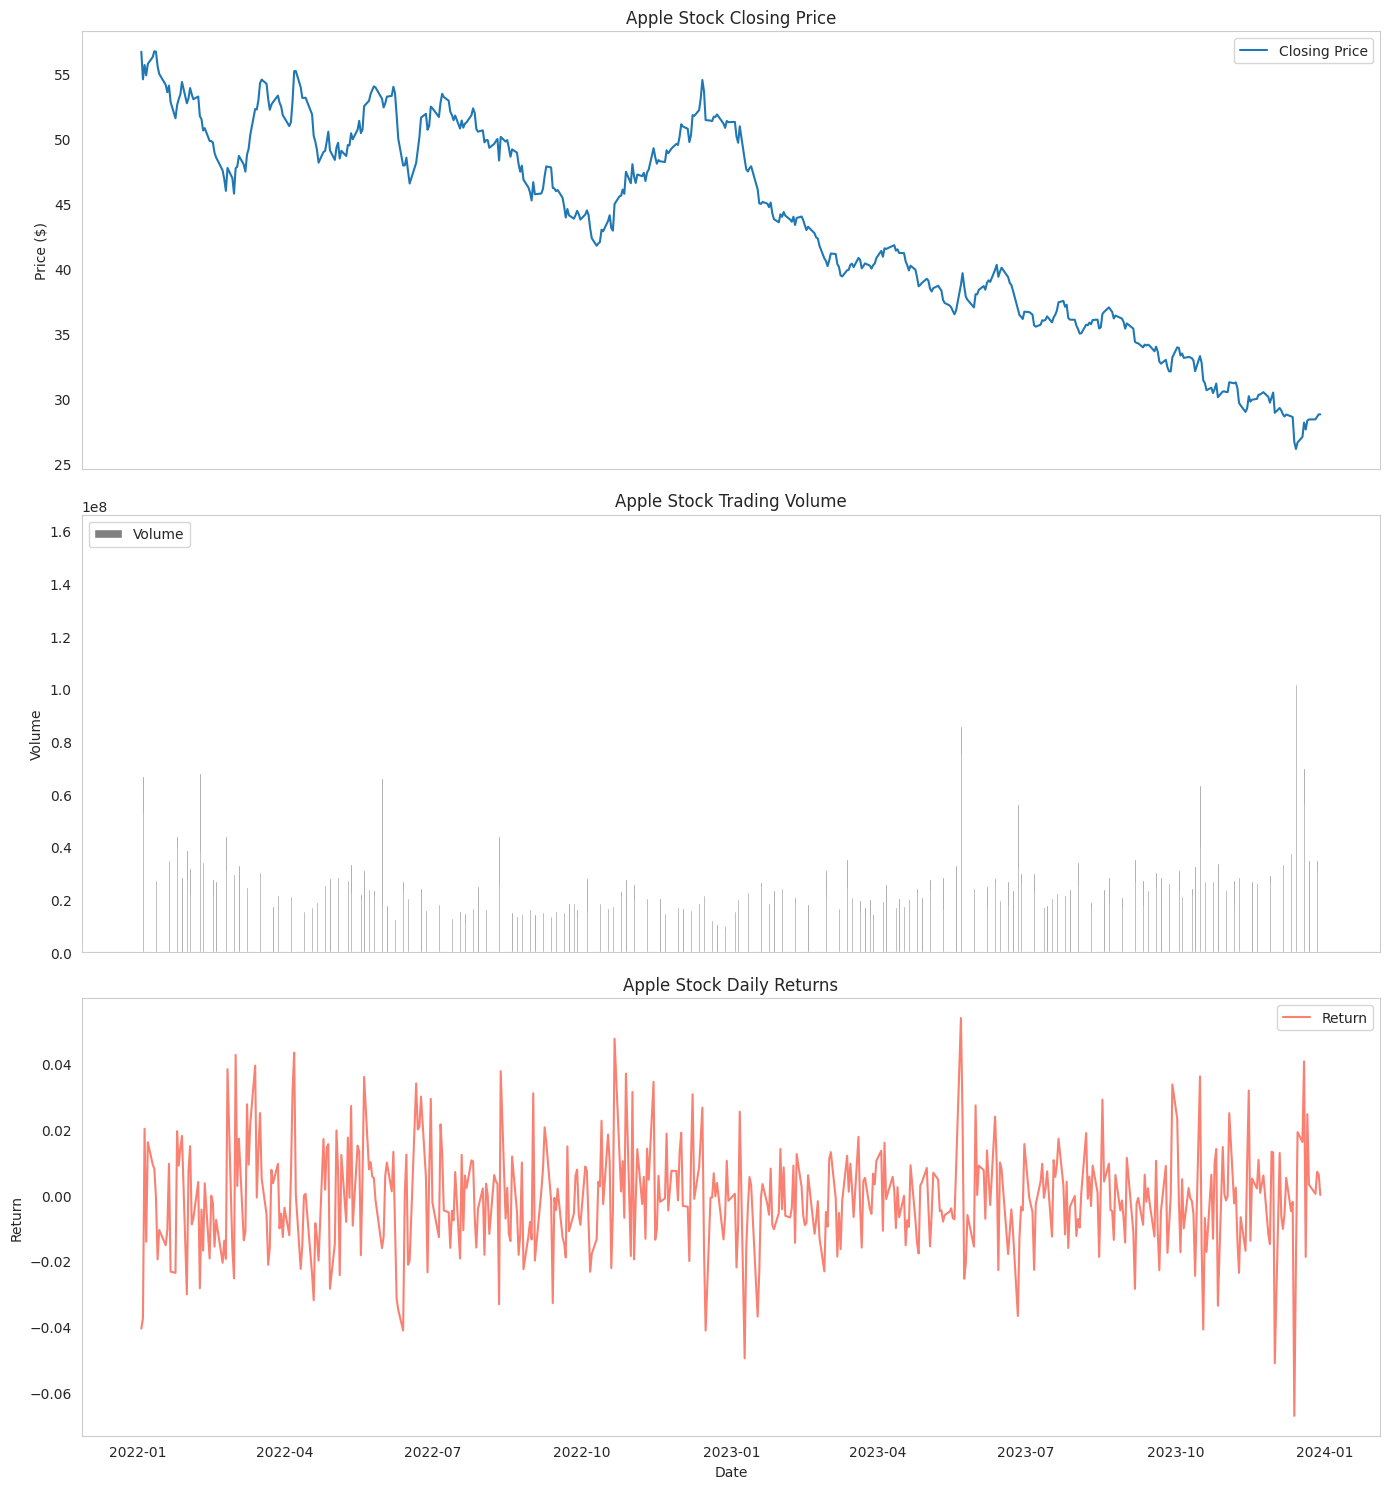

In [11]:
# Create a combined plot with three subplots on one figure, sharing the same x-axis
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 15), sharex=True)

# Plot Closing Price on the first subplot
ax1.plot(df.index, df['PRC'], label='Closing Price')
ax1.set_title('Apple Stock Closing Price')
ax1.set_ylabel('Price ($)')
ax1.legend()

# Plot Volume on the second subplot
ax2.bar(df.index, df['VOL'], label='Volume', color='grey')
ax2.set_title('Apple Stock Trading Volume')
ax2.set_ylabel('Volume')
ax2.legend()

# Plot Returns on the third subplot
ax3.plot(df.index, df['RET'], label='Return', color='salmon')
ax3.set_title('Apple Stock Daily Returns')
ax3.set_ylabel('Return')
ax3.set_xlabel('Date')
ax3.legend()

# Improve layout and show plot
plt.tight_layout()
plt.show()


In [12]:
pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.3 MB/s eta 0:00:00


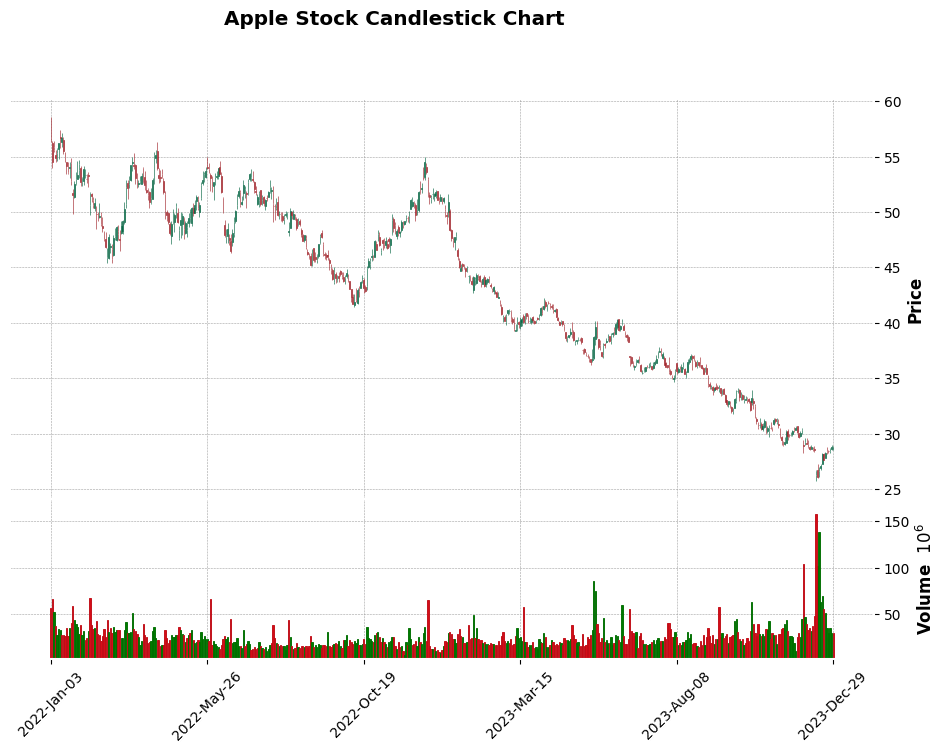

In [13]:
import mplfinance as mpf
temp_df = df.copy()
temp_df.rename(columns={
    'OPENPRC': 'Open',
    'ASKHI': 'High',
    'BIDLO': 'Low',
    'PRC': 'Close',
    'VOL': 'Volume'
}, inplace=True)

# Create a candlestick chart with volume using the temporary DataFrame
mpf.plot(temp_df[['Open', 'High', 'Low', 'Close', 'Volume']],
         type='candle',
         style='charles',
         title='Apple Stock Candlestick Chart',
         volume=True,
         figsize=(12, 8))

# Display the plot
mpf.show()


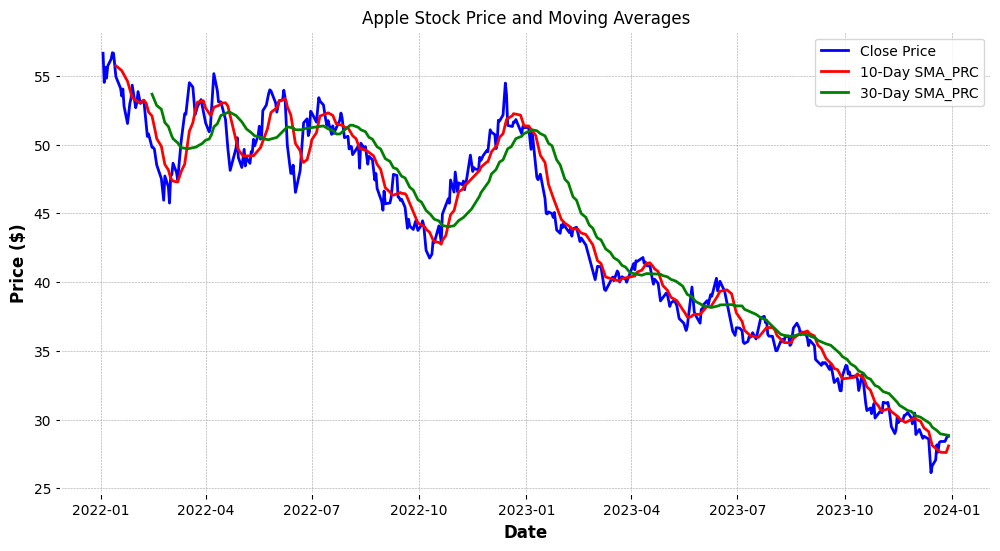

In [14]:
df['SMA_10_PRC'] = df['PRC'].rolling(window=10).mean()
df['SMA_30_PRC'] = df['PRC'].rolling(window=30).mean()

# Plotting the close price along with the moving averages
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['PRC'], label='Close Price', color='blue')
plt.plot(df.index, df['SMA_10_PRC'], label='10-Day SMA_PRC', color='red')
plt.plot(df.index, df['SMA_30_PRC'], label='30-Day SMA_PRC', color='green')

# Adding titles and labels
plt.title('Apple Stock Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()


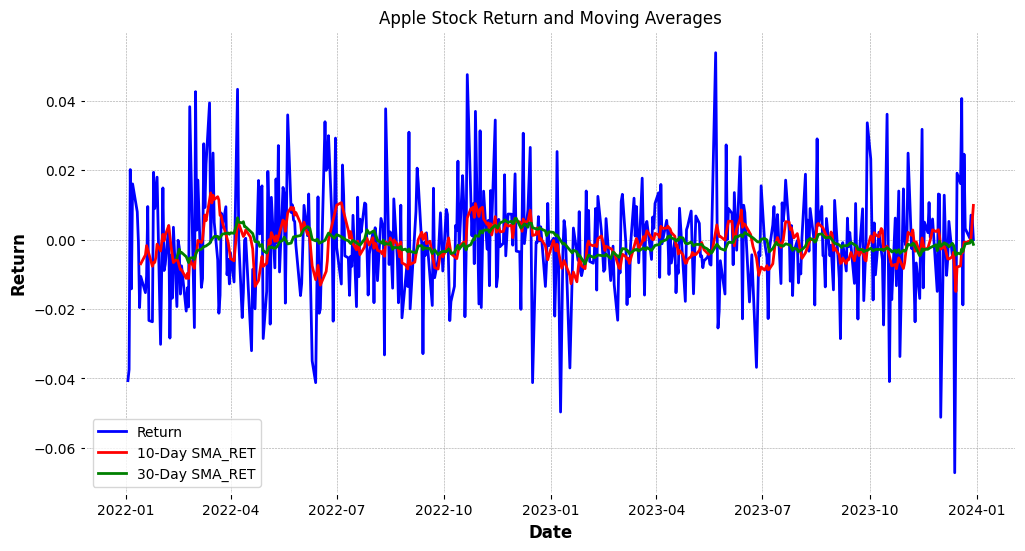

In [15]:
df['SMA_10_RET'] = df['RET'].rolling(window=10).mean()
df['SMA_30_RET'] = df['RET'].rolling(window=30).mean()

# Plotting the close price along with the moving averages
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['RET'], label='Return', color='blue')
plt.plot(df.index, df['SMA_10_RET'], label='10-Day SMA_RET', color='red')
plt.plot(df.index, df['SMA_30_RET'], label='30-Day SMA_RET', color='green')

# Adding titles and labels
plt.title('Apple Stock Return and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.show()


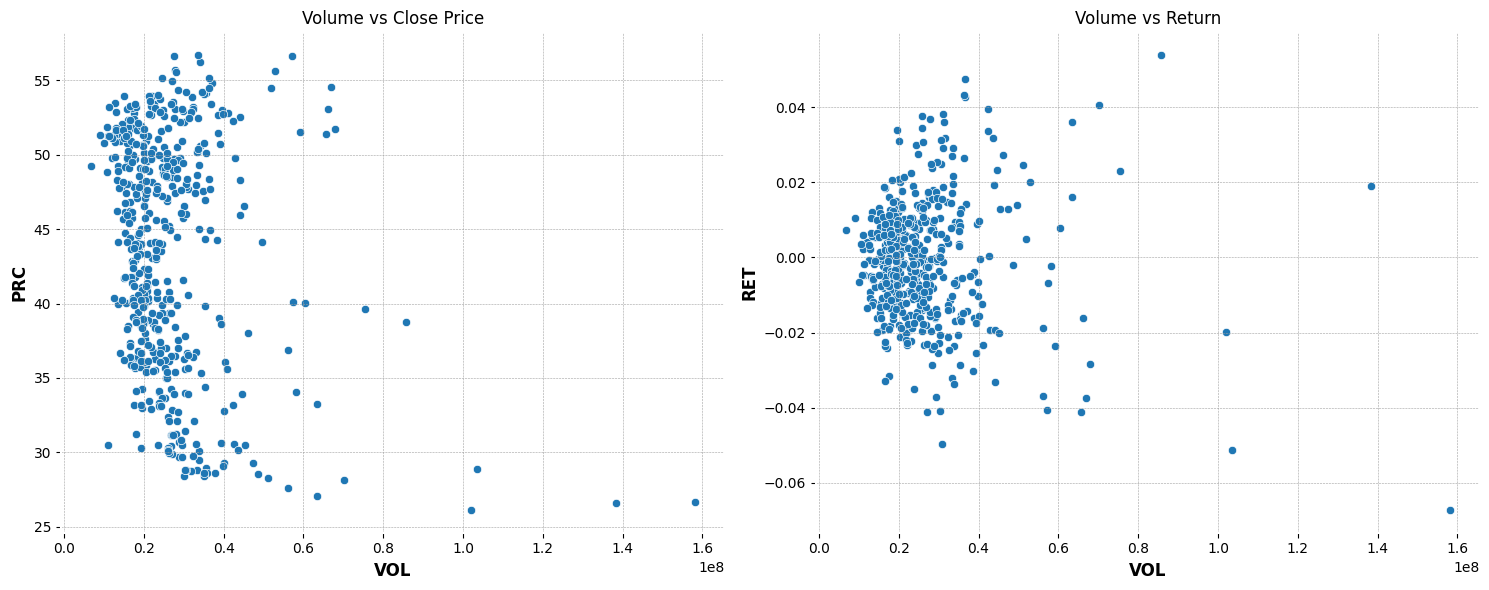

In [16]:
# Create a figure and two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Scatter plot for 'Volume vs Close Price'
sns.scatterplot(x='VOL', y='PRC', data=df, ax=axes[0])
axes[0].set_title('Volume vs Close Price')

# Scatter plot for 'Volume vs Return'
sns.scatterplot(x='VOL', y='RET', data=df, ax=axes[1])
axes[1].set_title('Volume vs Return')

# Display the plots
plt.tight_layout()
plt.show()



*   Volume vs. Price




A high trading volume can be associated with significant price events like earnings announcements or other market news, which could explain the spread in prices at higher volumes. If prices are generally higher at higher volumes, it may suggest periods of bullish sentiment, whereas lower volumes might indicate less trading confidence or interest.
*   Volume vs. Return

While volume increases may correspond to more significant price movements (not necessarily leading to positive returns), the overall returns do not dramatically shift from zero. It suggests that higher volumes are not consistently associated with positive or negative returns but rather with increased activity that could go either way, depending on other market conditions or news.



In [17]:
df.drop(columns=['SMA_10_PRC', 'SMA_30_PRC', 'SMA_10_RET', 'SMA_30_RET'], inplace=True)

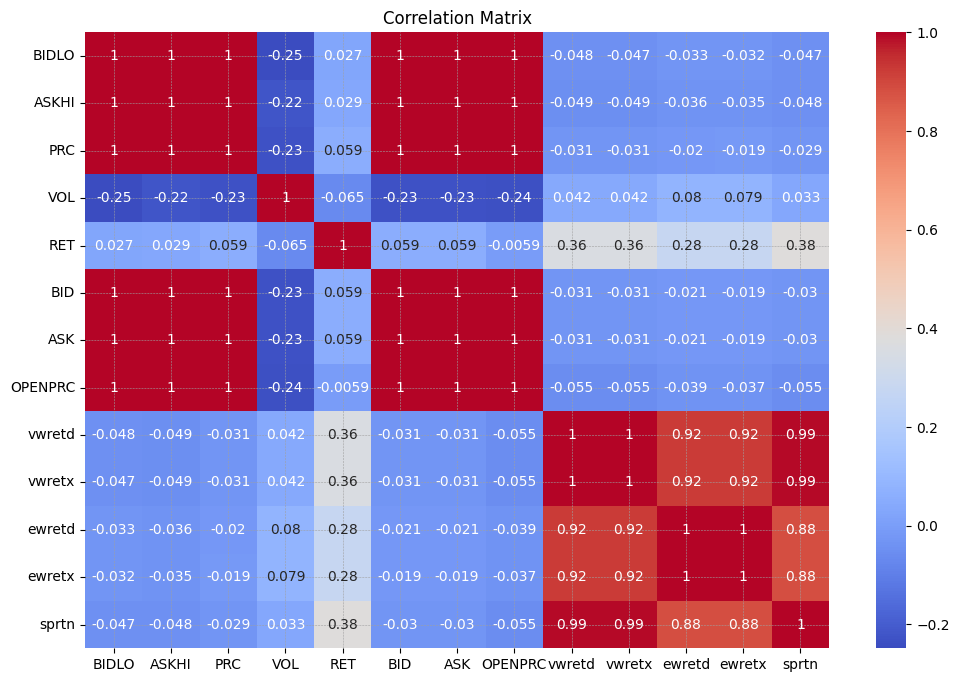

In [18]:
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Add a constant for VIF calculation (necessary as VIF assumes a model intercept)
numeric_df = add_constant(numeric_df)

# Calculate VIF values
VIFs = pd.Series([variance_inflation_factor(numeric_df.values, i)
                  for i in range(numeric_df.shape[1])],
                 index=numeric_df.columns)

# Print VIF values
print("Variance Inflation Factors:")
print(VIFs)

Variance Inflation Factors:
const      6.356059e+01
BIDLO      1.070867e+03
ASKHI      1.226917e+03
PRC        1.741648e+05
VOL        1.662937e+00
RET        3.882364e+00
BID        6.009319e+06
ASK        5.778600e+06
OPENPRC    1.283728e+03
vwretd     6.797842e+04
vwretx     6.783194e+04
ewretd     3.698461e+04
ewretx     3.692076e+04
sprtn      3.264695e+02
dtype: float64


# Prediction with Close Price (PRC)

In [20]:
df_prc = df[['PRC']]
df_prc.head(10)


PRC
date             
2022-01-03  56.65
2022-01-04  54.53
2022-01-05  55.63
2022-01-06  54.84
2022-01-07  55.72
2022-01-10  56.24
2022-01-11  56.69
2022-01-12  56.65
2022-01-13  55.54
2022-01-14  54.95

In [21]:
from sklearn.preprocessing import MinMaxScaler
import datetime

scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled_prc = pd.DataFrame(scaler.fit_transform(df_prc), columns=df_prc.columns, index=df_prc.index)

In [22]:
def window_dataset(data, first_date_str, last_date_str, target_col='PRC', time_step=1):
    first_date = pd.to_datetime(first_date_str)
    last_date = pd.to_datetime(last_date_str)

    dates, X, y = [], [], []

    target_date = first_date
    while target_date <= last_date:
        if target_date not in data.index:
            target_date += datetime.timedelta(days=1)
            continue

        start_idx = data.index.get_loc(target_date)
        if start_idx + time_step + 1 >= len(data):
            break

        X.append(data.iloc[start_idx:start_idx + time_step].values)
        y.append(data.iloc[start_idx + time_step][target_col])
        dates.append(target_date)

        next_week = data.loc[target_date:target_date + datetime.timedelta(days=7)]
        if len(next_week) < 2:
            break

        next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
        next_date_str = next_datetime_str.split('T')[0]
        year, month, day = map(int, next_date_str.split('-'))
        next_date = datetime.datetime(year=year, month=month, day=day)

        if target_date == last_date:
            break

        target_date = next_date

    return np.array(dates), np.array(X).astype(np.float32), np.array(y).astype(np.float32)


In [23]:
time_step = 90 #Adjust as needed for actural data
dates, X, y = window_dataset(df_scaled_prc, '2022-01-03', '2023-12-29', target_col='PRC', time_step = time_step)
print("Dates:", dates.shape)
print("X shape:", X.shape)
print("y shape:", y.shape)

Dates: (410,)
X shape: (410, 90, 1)
y shape: (410,)


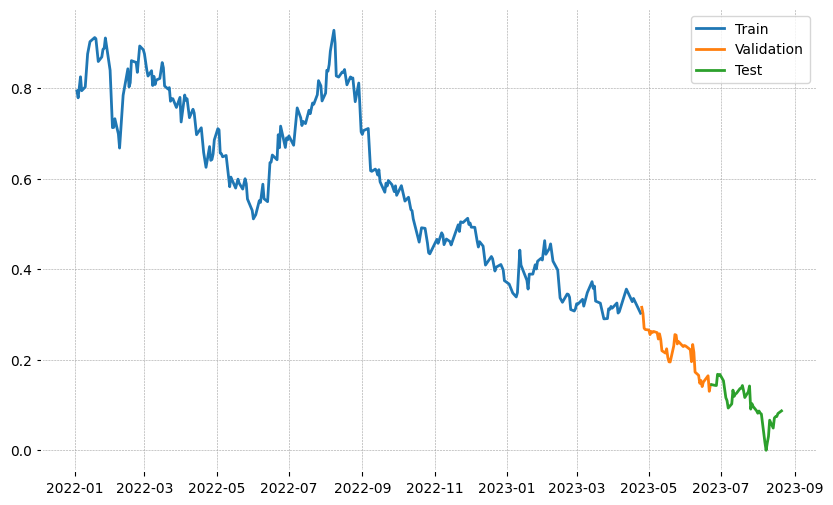

In [24]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]
dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.figure(figsize=(10, 6))
plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
def evaluate_performance(true_values, predictions, dataset_type="Dataset"):
    mse = mean_squared_error(true_values, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(true_values, predictions)

    print(f"{dataset_type} Performance:")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print("")

## ARIMA Prediction



In [26]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

def evaluate_arima_model(order):
    # Fit ARIMA model
    train_series = pd.Series(y_train, index=dates_train)
    model = ARIMA(train_series, order=order)
    model_fit = model.fit()

    # Forecasting beyond the training data
    n_forecast_val = len(dates_val)

    # Get forecast for validation set
    val_forecast = model_fit.get_forecast(steps=n_forecast_val)
    val_pred = val_forecast.predicted_mean

    # Inverse transform the predictions
    val_pred_inv = scaler.inverse_transform(val_pred.values.reshape(-1, 1)).flatten()
    y_val_inv = scaler.inverse_transform(y_val.reshape(-1, 1)).flatten()

    # Calculate MSE and MAE for validation set
    val_mse = mean_squared_error(y_val_inv, val_pred_inv)
    val_mae = mean_absolute_error(y_val_inv, val_pred_inv)

    return val_mse, val_mae

# Grid search for ARIMA parameters
best_order = None
best_mse = float("inf")
best_mae = float("inf")

for p in range(6):
    for d in range(3):
        for q in range(6):
            order = (p, d, q)
            try:
                mse, mae = evaluate_arima_model(order)
                if mse < best_mse:
                    best_mse = mse
                    best_mae = mae
                    best_order = order
                print(f'Order {order} - Validation MSE: {mse}, Validation MAE: {mae}')
            except:
                continue

print(f'Best order: {best_order} - Validation MSE: {best_mse}, Validation MAE: {best_mae}')

Order (0, 0, 0) - Validation MSE: 130.571883803729, Validation MAE: 11.344938123549948
Order (0, 0, 1) - Validation MSE: 129.32286586814385, Validation MAE: 11.251105305277456
Order (0, 0, 2) - Validation MSE: 127.8847922941107, Validation MAE: 11.128239485957936
Order (0, 0, 3) - Validation MSE: 126.6907172794858, Validation MAE: 11.027047281324368
Order (0, 0, 4) - Validation MSE: 125.52512039387139, Validation MAE: 10.92420431428122
Order (0, 0, 5) - Validation MSE: 123.95298240569173, Validation MAE: 10.813567128394611
Order (0, 1, 0) - Validation MSE: 7.962753086082896, Validation MAE: 2.4890243134847503
Order (0, 1, 1) - Validation MSE: 7.747335709186792, Validation MAE: 2.449310125923973
Order (0, 1, 2) - Validation MSE: 7.992027307828066, Validation MAE: 2.4953242584982065
Order (0, 1, 3) - Validation MSE: 8.003240395078652, Validation MAE: 2.4974888666209107
Order (0, 1, 4) - Validation MSE: 7.828320474453135, Validation MAE: 2.4641323313642167
Order (0, 1, 5) - Validation MSE

In [27]:
# Fit the best ARIMA model on the entire training data
train_series = pd.Series(y_train, index=dates_train)
best_model = ARIMA(train_series, order=best_order)
best_model_fit = best_model.fit()

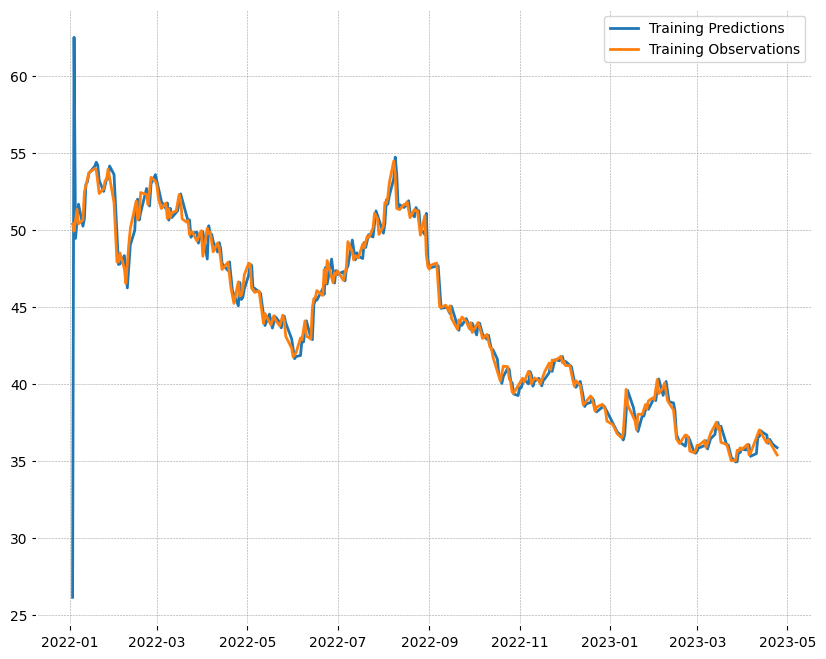

ARIMA Training Performance:
MSE: 2.7331217734430413
RMSE: 1.6532155858940605
MAE: 0.6117889797223793



In [28]:
# Predicting and inverse transforming for training data
train_predictions_arima = best_model_fit.predict(start=0, end=len(dates_train)-1, typ='levels')
train_arima_inv = scaler.inverse_transform(train_predictions_arima.values.reshape(-1, 1)).flatten()
y_train_arima_inv = scaler.inverse_transform(y_train.reshape(-1, 1)).flatten()

# Plotting training data
plt.figure(figsize=(10, 8))
plt.plot(dates_train, train_arima_inv)
plt.plot(dates_train, y_train_arima_inv)
plt.legend(['Training Predictions', 'Training Observations'])
plt.show()

# Calculate performance values for training data
evaluate_performance(y_train_arima_inv, train_arima_inv, "ARIMA Training")

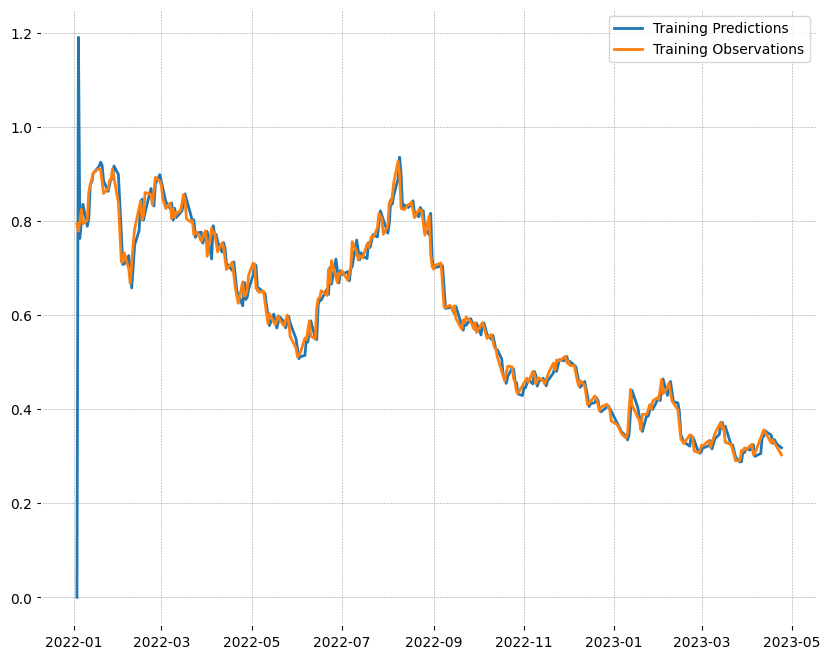

ARIMA Training Performance:
MSE: 0.002926524928565497
RMSE: 0.05409736526454405
MAE: 0.02001926636897282



In [29]:
# Predicting for training data without inverse transforming
train_predictions_arima = best_model_fit.predict(start=0, end=len(dates_train)-1, typ='levels')

# Plotting training data directly using scaled values
plt.figure(figsize=(10, 8))
plt.plot(dates_train, train_predictions_arima.values)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])
plt.show()

# Calculate performance values for training data using scaled values
evaluate_performance(y_train, train_predictions_arima.values, "ARIMA Training")


In [30]:
n_forecast_val = len(dates_val)
n_forecast_test = len(dates_test)

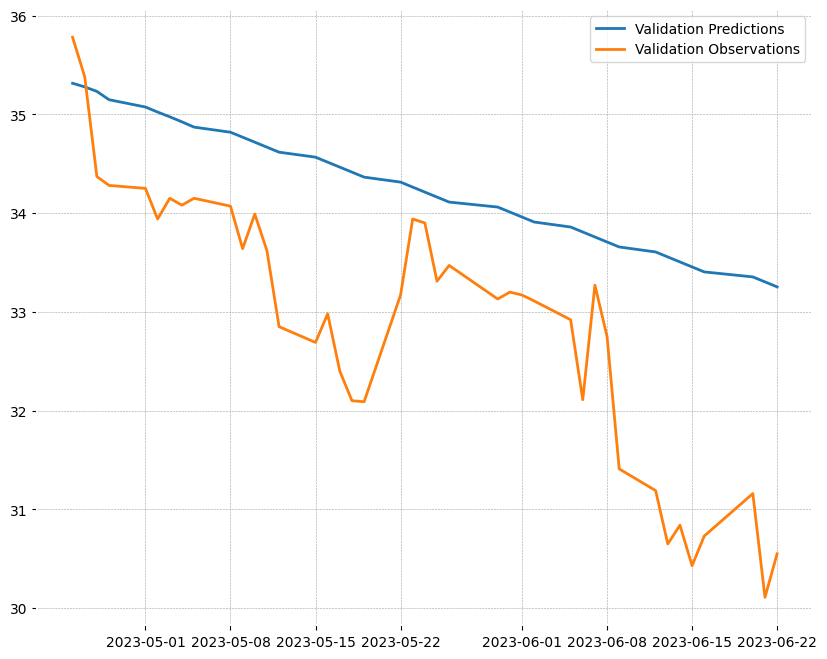

ARIMA Validation Performance:
MSE: 2.6375893363391327
RMSE: 1.624065681042221
MAE: 1.385020203917527



In [31]:
# Predicting and inverse transforming for validation data
val_forecast = best_model_fit.get_forecast(steps=n_forecast_val)
val_pred = val_forecast.predicted_mean
val_arima_inv = scaler.inverse_transform(val_pred.values.reshape(-1, 1)).flatten()
y_val_arima_inv = scaler.inverse_transform(y_val.reshape(-1, 1)).flatten()

# Plotting validation data
plt.figure(figsize=(10, 8))
plt.plot(dates_val, val_arima_inv)
plt.plot(dates_val, y_val_arima_inv)
plt.legend(['Validation Predictions', 'Validation Observations'])
plt.show()

# Calculate performance values for validation data
evaluate_performance(y_val_arima_inv, val_arima_inv, "ARIMA Validation")

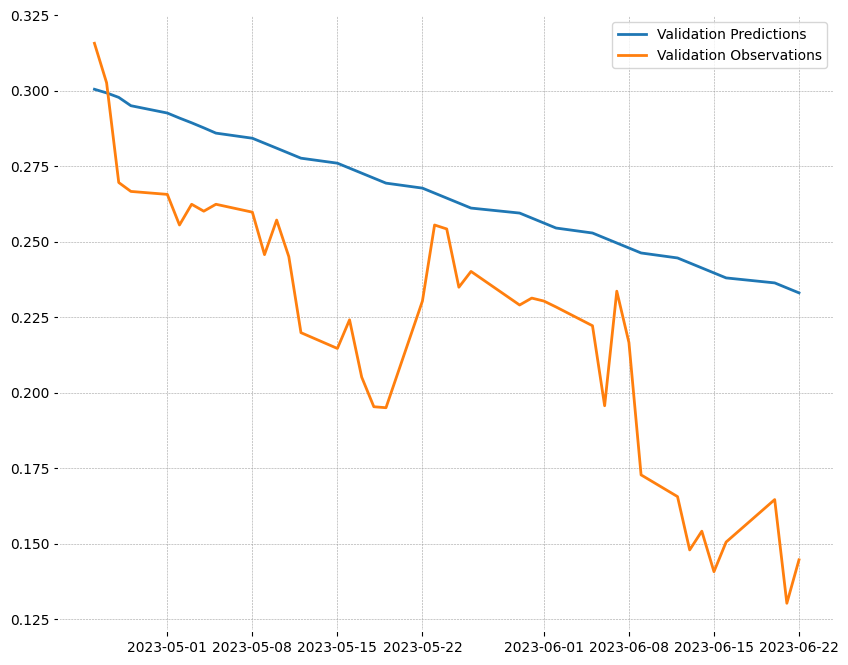

ARIMA Validation Performance:
MSE: 0.002824232001739644
RMSE: 0.0531435038526784
MAE: 0.04532133681715686



In [32]:
# Predicting for validation data without inverse transforming
val_forecast = best_model_fit.get_forecast(steps=n_forecast_val)
val_pred = val_forecast.predicted_mean

# Plotting validation data directly using scaled values
plt.figure(figsize=(10, 8))
plt.plot(dates_val, val_pred.values)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])
plt.show()

# Calculate performance values for validation data using scaled values
evaluate_performance(y_val, val_pred.values, "ARIMA Validation")


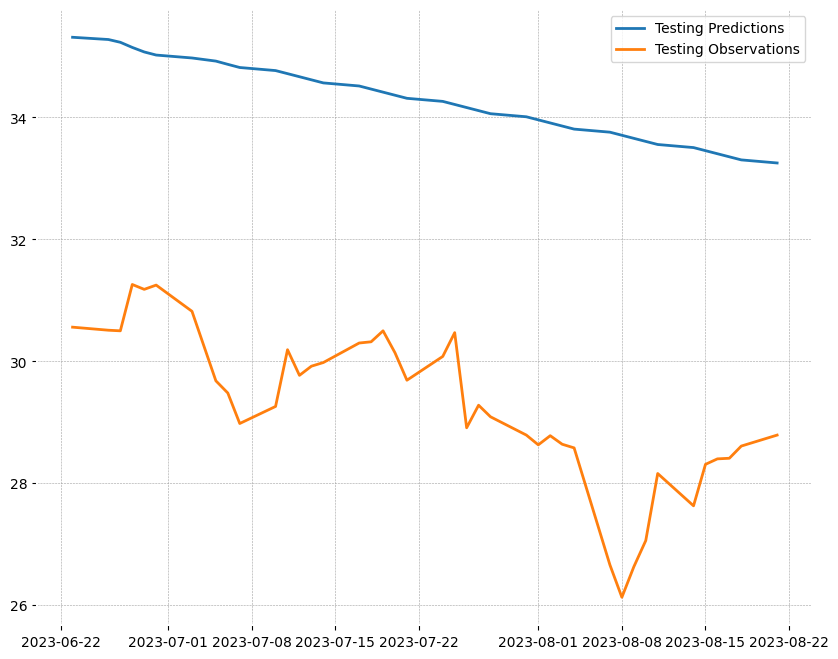

ARIMA Testing Performance:
MSE: 25.677889697225343
RMSE: 5.067335561932459
MAE: 4.991460472074112



In [33]:
# Predicting and inverse transforming for test data
test_forecast = best_model_fit.get_forecast(steps=n_forecast_test)
test_pred = test_forecast.predicted_mean
test_arima_inv = scaler.inverse_transform(test_pred.values.reshape(-1, 1)).flatten()
y_test_arima_inv = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Plotting test data
plt.figure(figsize=(10, 8))
plt.plot(dates_test, test_arima_inv)
plt.plot(dates_test, y_test_arima_inv)
plt.legend(['Testing Predictions', 'Testing Observations'])
plt.show()

# Calculate performance values for validation data
evaluate_performance(y_test_arima_inv, test_arima_inv, "ARIMA Testing")

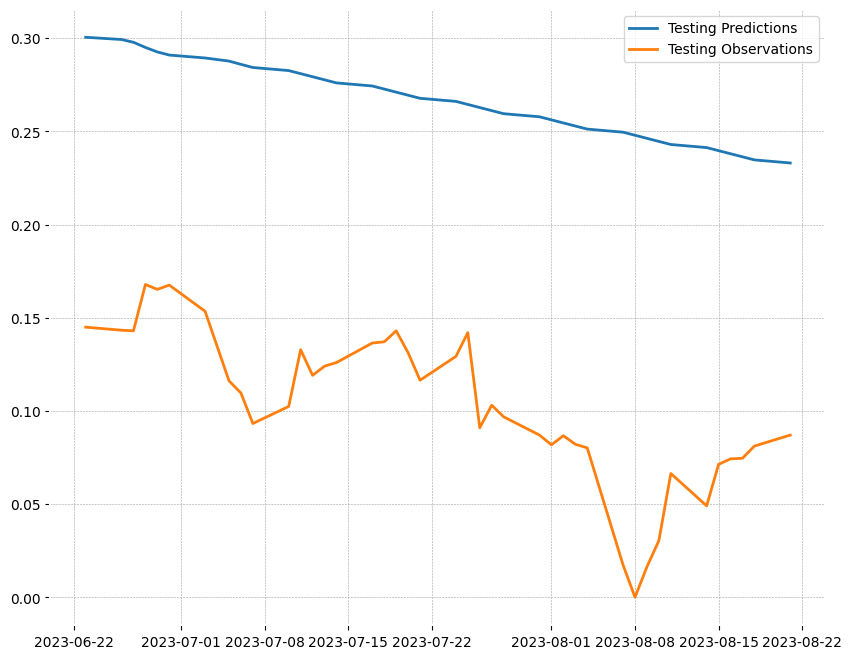

ARIMA Testing Performance:
MSE: 0.027494928408468726
RMSE: 0.16581594738887068
MAE: 0.16333312284069726



In [34]:
# Predicting for test data without inverse transforming
test_forecast = best_model_fit.get_forecast(steps=n_forecast_test)
test_pred = test_forecast.predicted_mean

# Plotting test data directly using scaled values
plt.figure(figsize=(10, 8))
plt.plot(dates_test, test_pred.values)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])
plt.show()

# Calculate performance values for testing data using scaled values
evaluate_performance(y_test, test_pred.values, "ARIMA Testing")


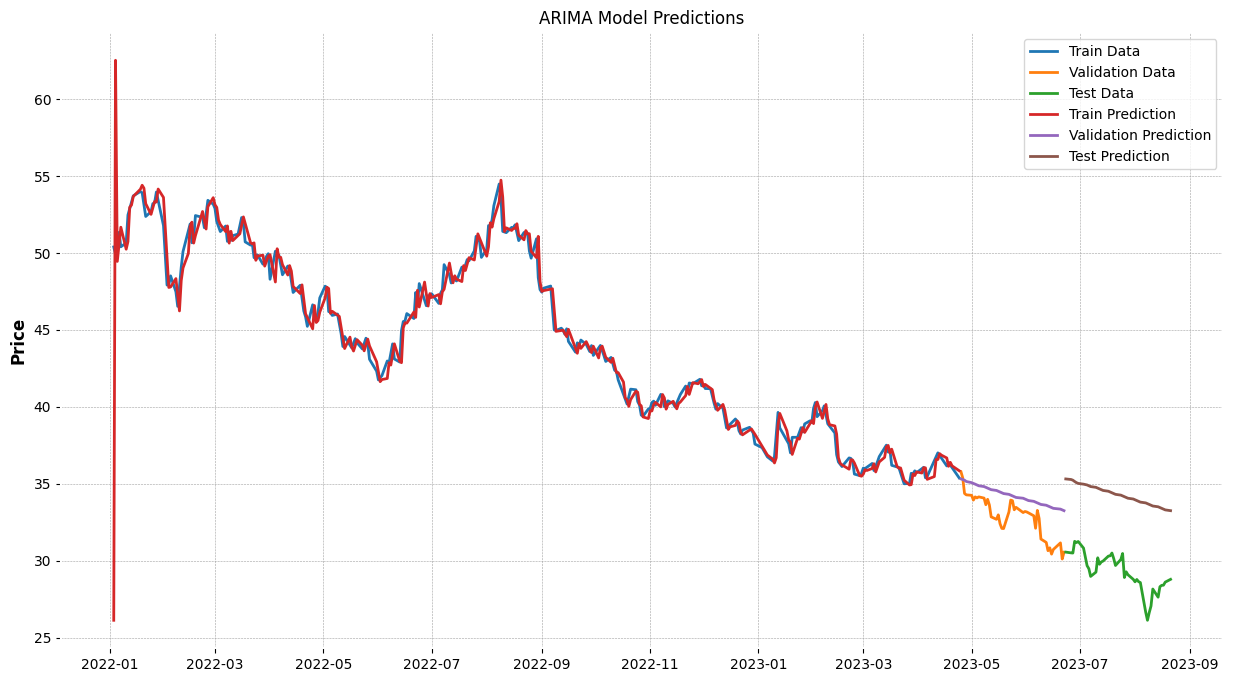

In [35]:
# Plot the predictions
plt.figure(figsize=(15, 8))
plt.plot(dates_train, y_train_arima_inv, label='Train Data')
plt.plot(dates_val, y_val_arima_inv, label='Validation Data')
plt.plot(dates_test, y_test_arima_inv, label='Test Data')
plt.plot(dates_train, train_arima_inv, label='Train Prediction')
plt.plot(dates_val, val_arima_inv, label='Validation Prediction')
plt.plot(dates_test, test_arima_inv, label='Test Prediction')
plt.title('ARIMA Model Predictions')
plt.ylabel('Price')
plt.legend()
plt.show()


## LSTM Prediction

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((90, 1)),
            layers.LSTM(64),
            layers.Dense(32, activation='relu'),
            layers.Dense(32, activation='relu'),
            layers.Dense(1)
          ])

model.compile(loss='mse', optimizer=Adam(learning_rate=0.001), metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 0.4307 - mean_absolute_error: 0.6234 - val_loss: 0.0248 - val_mean_absolute_error: 0.1519
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.2165 - mean_absolute_error: 0.4302 - val_loss: 0.0161 - val_mean_absolute_error: 0.1241
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0221 - mean_absolute_error: 0.1218 - val_loss: 0.0139 - val_mean_absolute_error: 0.1146
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0129 - mean_absolute_error: 0.0904 - val_loss: 0.0360 - val_mean_absolute_error: 0.1881
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0084 - mean_absolute_error: 0.0798 - val_loss: 0.0192 - val_mean_absolute_error: 0.1359
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0055 - mean_absolute_error: 0.0641 - val_loss: 0.0204 - val_mean_absolute_error: 0.1405
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0050 - mean_absolute_error: 0.0620 - v

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


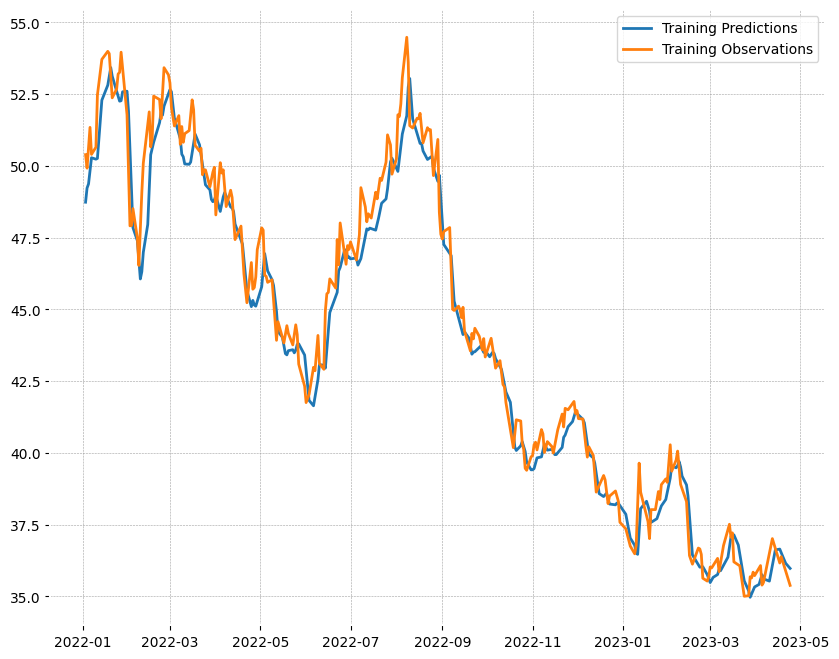

LSTM Training Performance:
MSE: 0.8440999388694763
RMSE: 0.9187490940093994
MAE: 0.7064725756645203



In [37]:
# Predicting and inverse transforming for training data
train_predictions = model.predict(X_train).flatten()
train_predictions_inv = scaler.inverse_transform(train_predictions.reshape(-1, 1)).flatten()
y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1)).flatten()

# Plotting training data
plt.figure(figsize=(10, 8))
plt.plot(dates_train, train_predictions_inv)
plt.plot(dates_train, y_train_inv)
plt.legend(['Training Predictions', 'Training Observations'])
plt.show()

evaluate_performance(y_train_inv, train_predictions_inv, "LSTM Training")

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


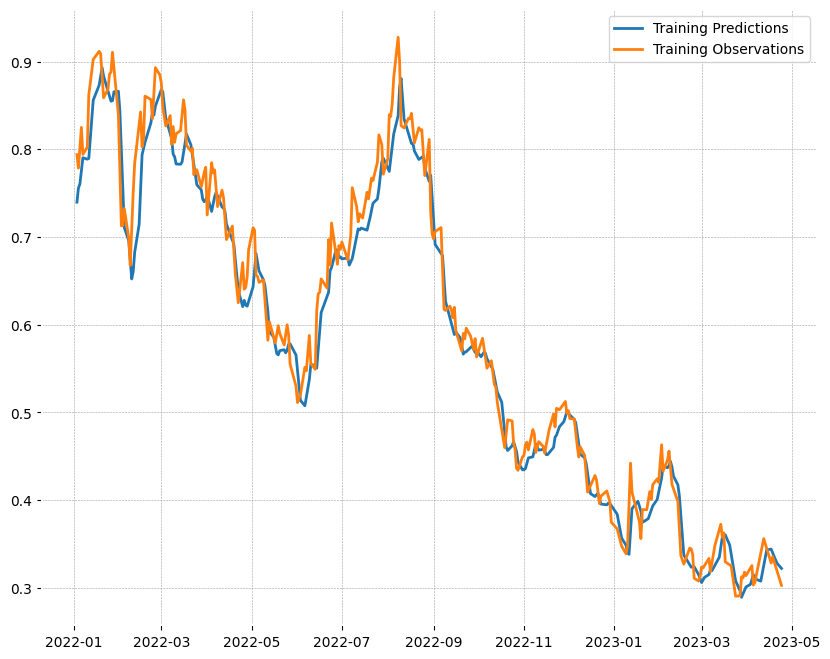

LSTM Training Performance:
MSE: 0.0009038305724970996
RMSE: 0.030063774436712265
MAE: 0.0231175534427166



In [38]:
# Predicting training data without inverse transforming
train_predictions = model.predict(X_train).flatten()

# Plotting training data
plt.figure(figsize=(10, 8))
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])
plt.show()

evaluate_performance(y_train, train_predictions, "LSTM Training")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


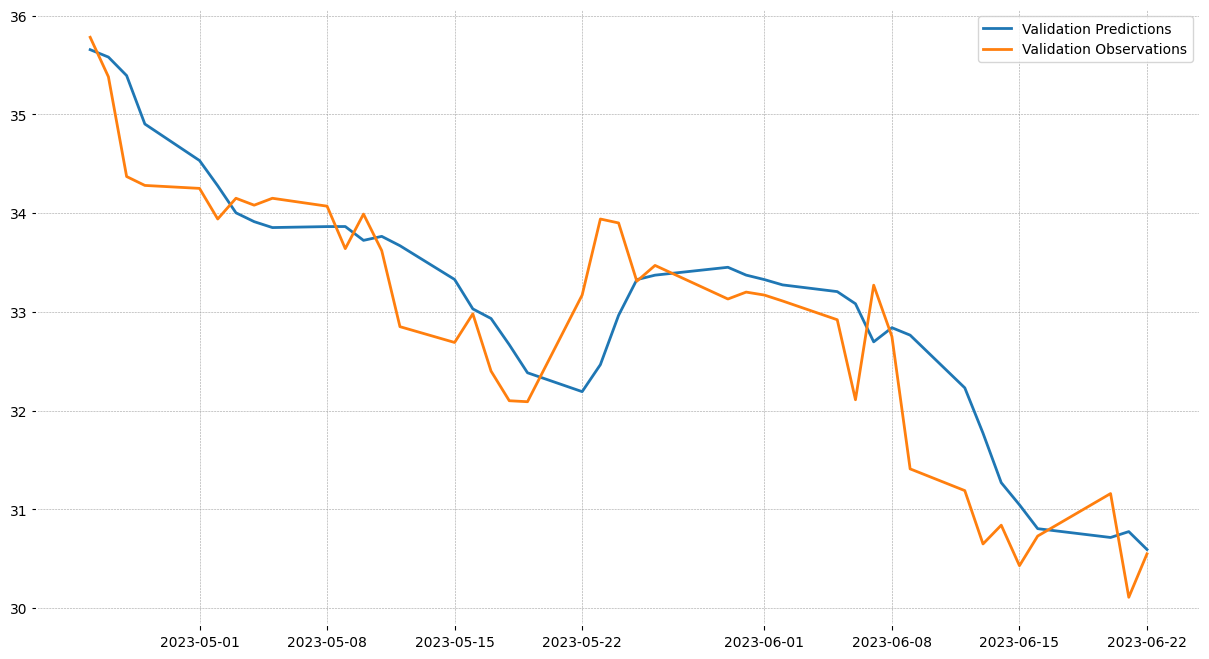

LSTM Validation Performance:
MSE: 0.35905036330223083
RMSE: 0.5992081165313721
MAE: 0.4625527858734131



In [39]:
# Predicting and inverse transforming for validation data
val_predictions = model.predict(X_val).flatten()
val_predictions_inv = scaler.inverse_transform(val_predictions.reshape(-1, 1)).flatten()
y_val_inv = scaler.inverse_transform(y_val.reshape(-1, 1)).flatten()

# Plotting validation data
plt.figure(figsize=(15, 8))
plt.plot(dates_val, val_predictions_inv)
plt.plot(dates_val, y_val_inv)
plt.legend(['Validation Predictions', 'Validation Observations'])
plt.show()

evaluate_performance(y_val_inv, val_predictions_inv, "LSTM Validation")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


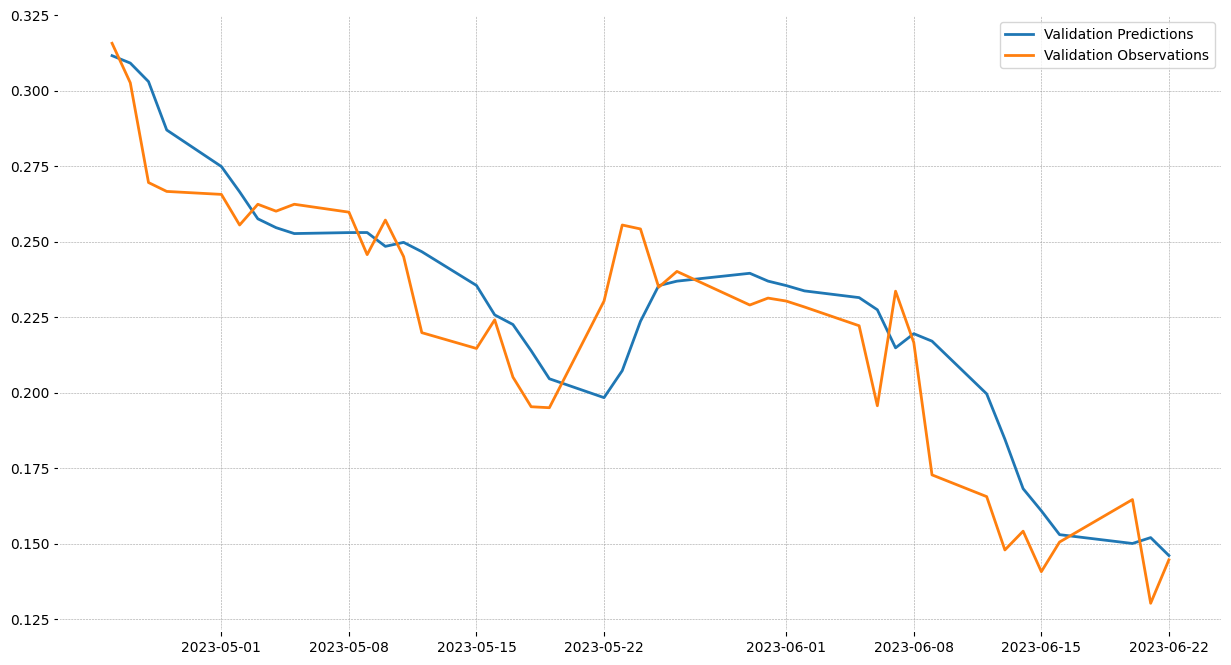

LSTM Validation Performance:
MSE: 0.00038445740938186646
RMSE: 0.019607584923505783
MAE: 0.015135887078940868



In [40]:
# Predicting validation data without inverse transforming
val_predictions = model.predict(X_val).flatten()

# Plotting validation data
plt.figure(figsize=(15, 8))
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])
plt.show()

evaluate_performance(y_val, val_predictions, "LSTM Validation")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


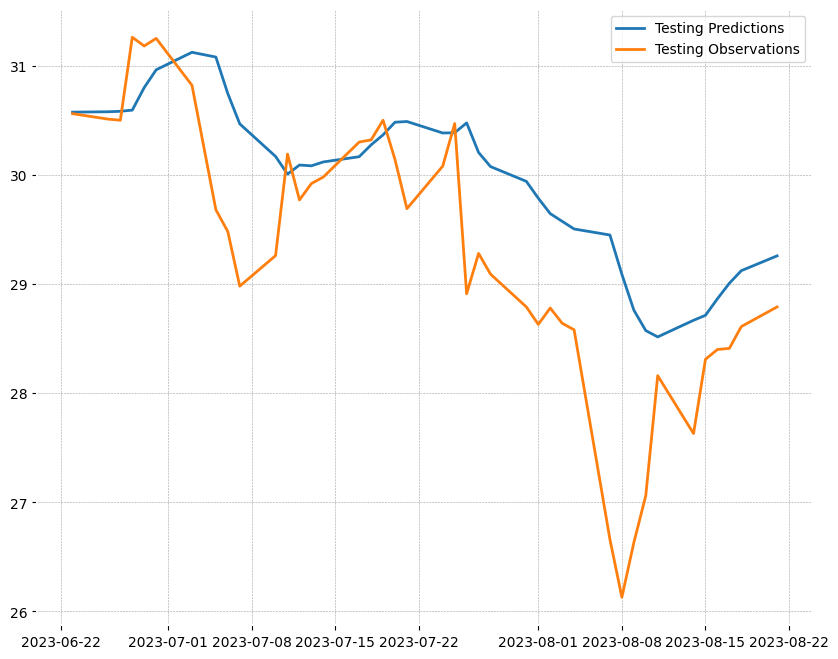

LSTM Testing Performance:
MSE: 1.0640102624893188
RMSE: 1.0315086841583252
MAE: 0.7618635296821594



In [41]:
# Predicting and inverse transforming for test data
test_predictions = model.predict(X_test).flatten()
test_predictions_inv = scaler.inverse_transform(test_predictions.reshape(-1, 1)).flatten()
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Plotting test data
plt.figure(figsize=(10, 8))
plt.plot(dates_test, test_predictions_inv)
plt.plot(dates_test, y_test_inv)
plt.legend(['Testing Predictions', 'Testing Observations'])
plt.show()

# Calculate performance values for test data
evaluate_performance(y_test_inv, test_predictions_inv, "LSTM Testing")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


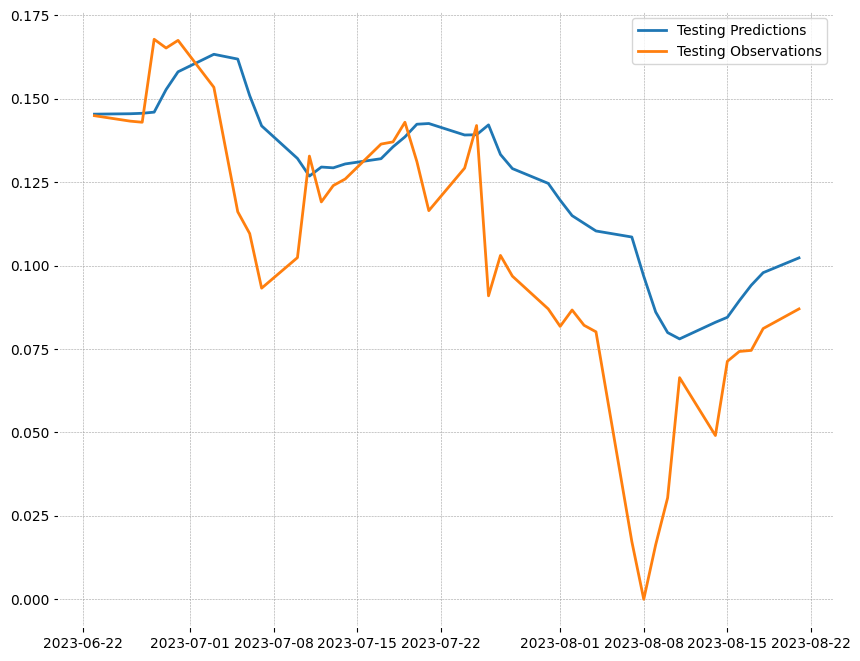

LSTM Testing Performance:
MSE: 0.0011393032036721706
RMSE: 0.033753566443920135
MAE: 0.02493009902536869



In [42]:
# Predicting for test data without inverse transforming
test_predictions = model.predict(X_test).flatten()

# Plotting test data
plt.figure(figsize=(10, 8))
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])
plt.show()

evaluate_performance(y_test, test_predictions, "LSTM Testing")


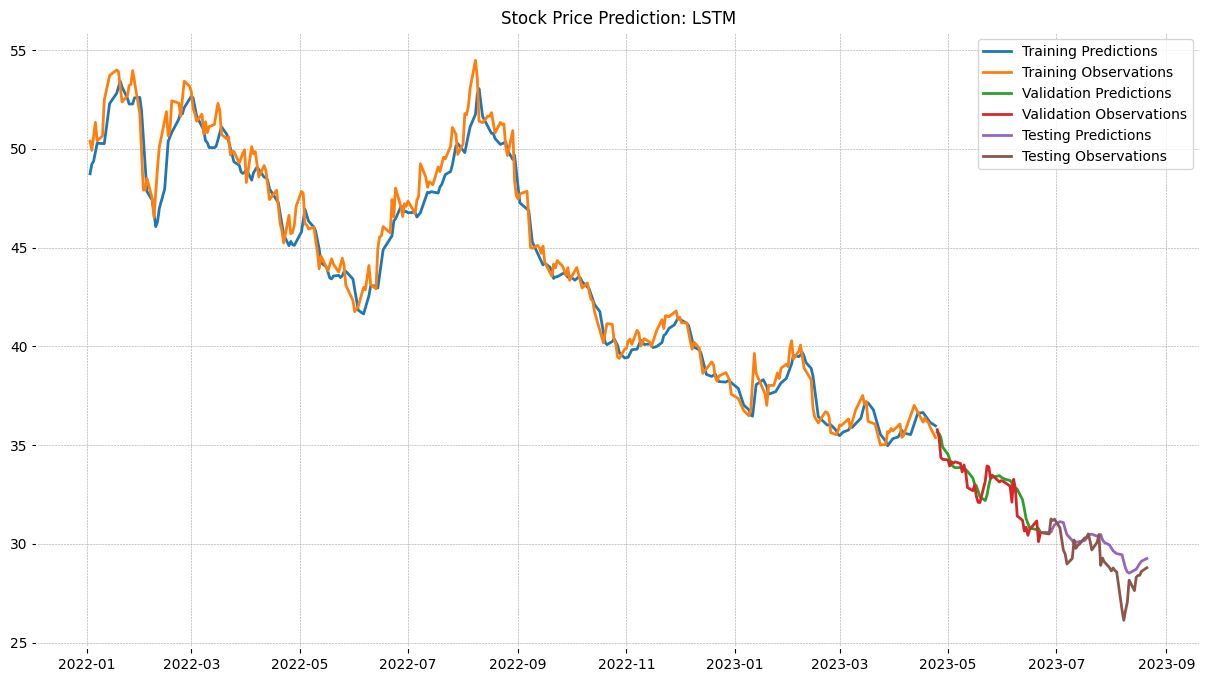

In [43]:
plt.figure(figsize=(15, 8))
plt.plot(dates_train, train_predictions_inv, label='Training Predictions')
plt.plot(dates_train, y_train_inv, label='Training Observations')
plt.plot(dates_val, val_predictions_inv, label='Validation Predictions')
plt.plot(dates_val, y_val_inv, label='Validation Observations')
plt.plot(dates_test, test_predictions_inv, label='Testing Predictions')
plt.plot(dates_test, y_test_inv, label='Testing Observations')
plt.title('Stock Price Prediction: LSTM')
plt.legend()
plt.show()

## SVR Prediction

In [44]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
# Combine train and validation sets for hyperparameter tuning
X_train_val = np.concatenate((X_train, X_val))
y_train_val = np.concatenate((y_train, y_val))

# # Reshape for GridSearchCV
X_train_val = X_train_val.reshape(-1, time_step)
X_test = X_test.reshape(-1, time_step)

# Define the SVR model
svr = SVR()

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'sigmoid']
}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train_val, y_train_val)

# Print the best parameters
best_params = grid_search.best_params_
print(f'Best parameters found: {best_params}')

# Train the SVR model using the best parameters
best_svr = grid_search.best_estimator_


Fitting 5 folds for each of 75 candidates, totalling 375 fits
Best parameters found: {'C': 0.1, 'gamma': 0.0001, 'kernel': 'linear'}


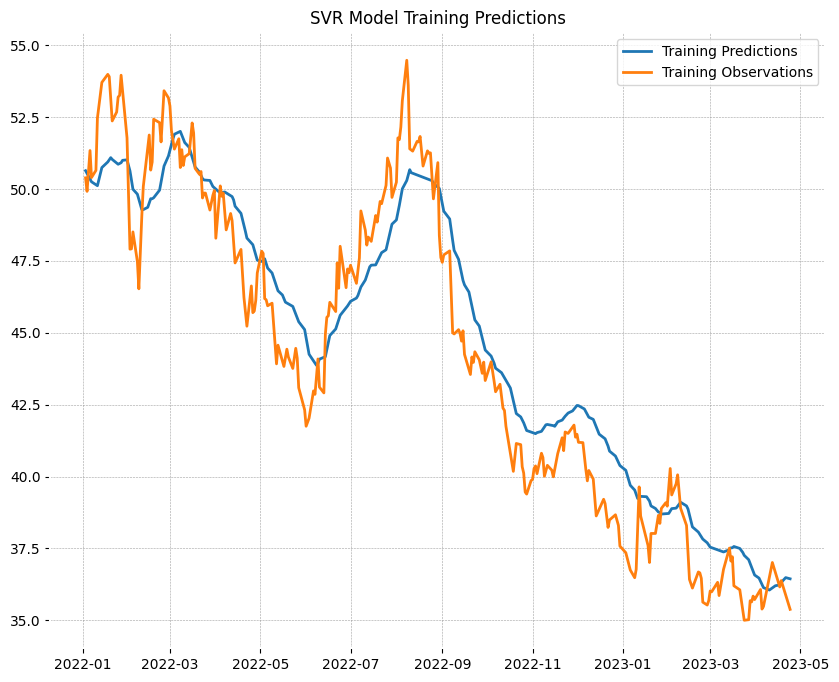

SVR Training Performance:
MSE: 2.7437855390855166
RMSE: 1.6564376049478944
MAE: 1.4228923578143533



In [45]:
# Train predictions and evaluation
train_predictions_svr = best_svr.predict(X_train.reshape(-1, time_step))
train_svr_inv = scaler.inverse_transform(train_predictions_svr.reshape(-1, 1)).flatten()
y_train_svr_inv = scaler.inverse_transform(y_train.reshape(-1, 1)).flatten()

plt.figure(figsize=(10, 8))
plt.plot(dates_train, train_svr_inv)
plt.plot(dates_train, y_train_svr_inv)
plt.legend(['Training Predictions', 'Training Observations'])
plt.title('SVR Model Training Predictions')
plt.show()

evaluate_performance(y_train_svr_inv, train_svr_inv, "SVR Training")

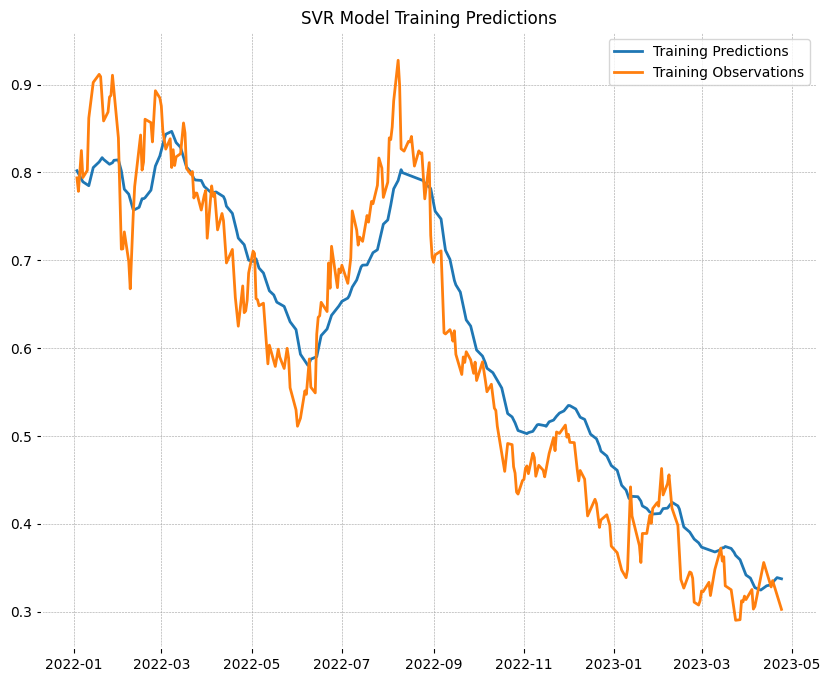

SVR Training Performance:
MSE: 0.0029379431644615647
RMSE: 0.05420279664797348
MAE: 0.04656061057084738



In [46]:
# Train predictions and evaluation without inverse transforming
train_predictions_svr = best_svr.predict(X_train.reshape(-1, time_step))

# Plotting training data directly using scaled values
plt.figure(figsize=(10, 8))
plt.plot(dates_train, train_predictions_svr)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])
plt.title('SVR Model Training Predictions')
plt.show()

evaluate_performance(y_train, train_predictions_svr, "SVR Training")

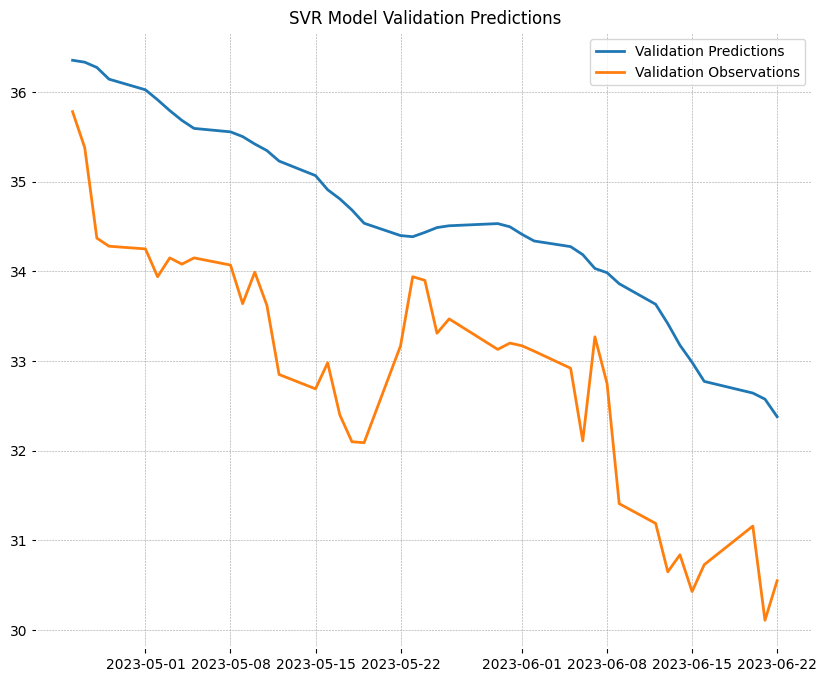

SVR Validation Performance:
MSE: 3.262165446091181
RMSE: 1.8061465738115445
MAE: 1.701287494506278



In [47]:
# Validation predictions and evaluation
val_predictions_svr = best_svr.predict(X_val.reshape(-1, time_step))
val_svr_inv = scaler.inverse_transform(val_predictions_svr.reshape(-1, 1)).flatten()
y_val_svr_inv = scaler.inverse_transform(y_val.reshape(-1, 1)).flatten()

plt.figure(figsize=(10, 8))
plt.plot(dates_val, val_svr_inv)
plt.plot(dates_val, y_val_svr_inv)
plt.legend(['Validation Predictions', 'Validation Observations'])
plt.title('SVR Model Validation Predictions')
plt.show()

evaluate_performance(y_val_svr_inv, val_svr_inv, "SVR Validation")

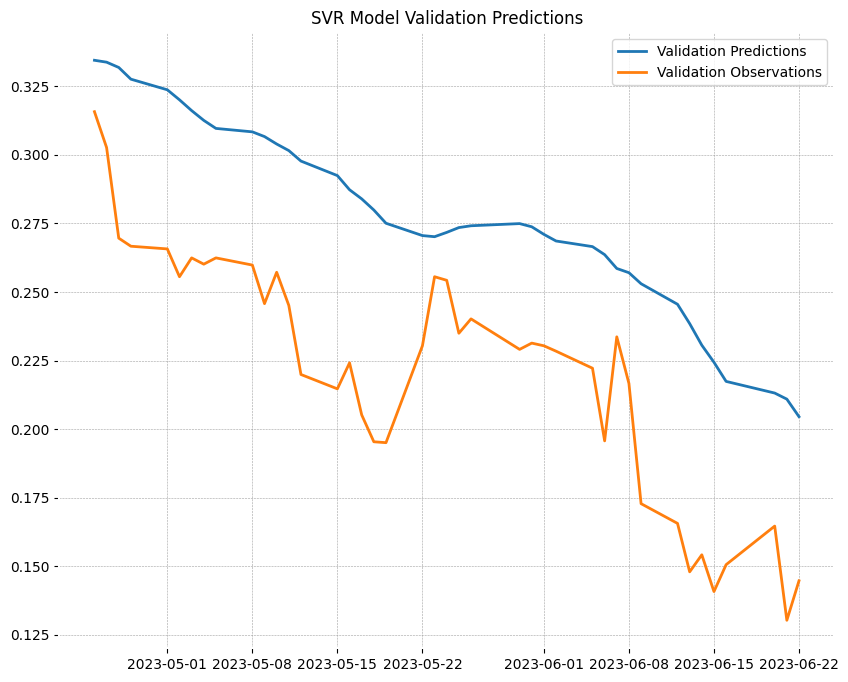

SVR Validation Performance:
MSE: 0.003493004484426072
RMSE: 0.05910164536141165
MAE: 0.05567039094146319



In [48]:
# Validation predictions and evaluation without inverse transforming
val_predictions_svr = best_svr.predict(X_val.reshape(-1, time_step))

# Plotting validation data directly using scaled values
plt.figure(figsize=(10, 8))
plt.plot(dates_val, val_predictions_svr)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])
plt.title('SVR Model Validation Predictions')
plt.show()

evaluate_performance(y_val, val_predictions_svr, "SVR Validation")



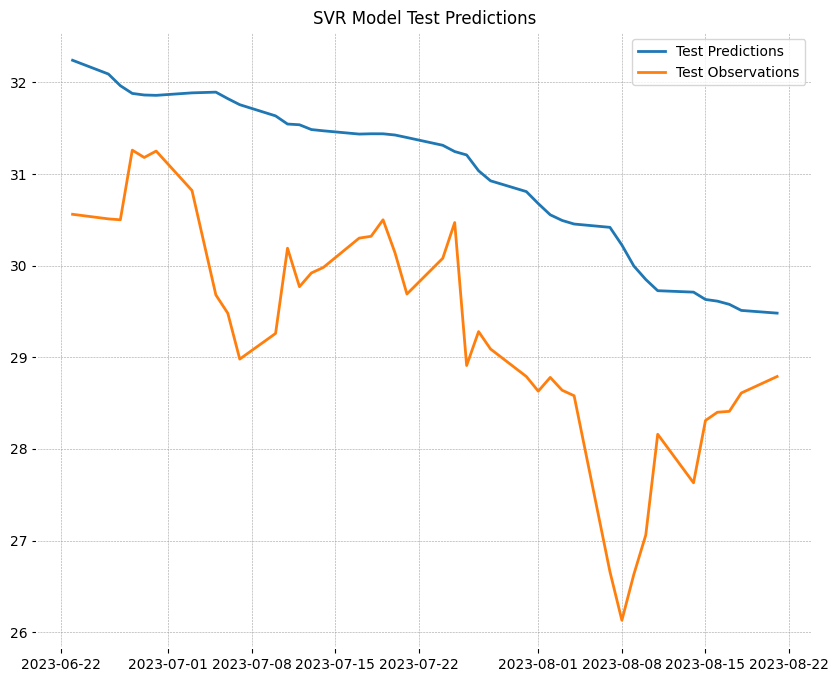

SVR Test Performance:
MSE: 3.5609361607871843
RMSE: 1.8870442922165829
MAE: 1.7115408964532983



In [49]:
# Test predictions and evaluation
test_predictions_svr = best_svr.predict(X_test)
test_svr_inv = scaler.inverse_transform(test_predictions_svr.reshape(-1, 1)).flatten()
y_test_svr_inv = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

plt.figure(figsize=(10, 8))
plt.plot(dates_test, test_svr_inv)
plt.plot(dates_test, y_test_svr_inv)
plt.legend(['Test Predictions', 'Test Observations'])
plt.title('SVR Model Test Predictions')
plt.show()

evaluate_performance(y_test_svr_inv, test_svr_inv, "SVR Test")

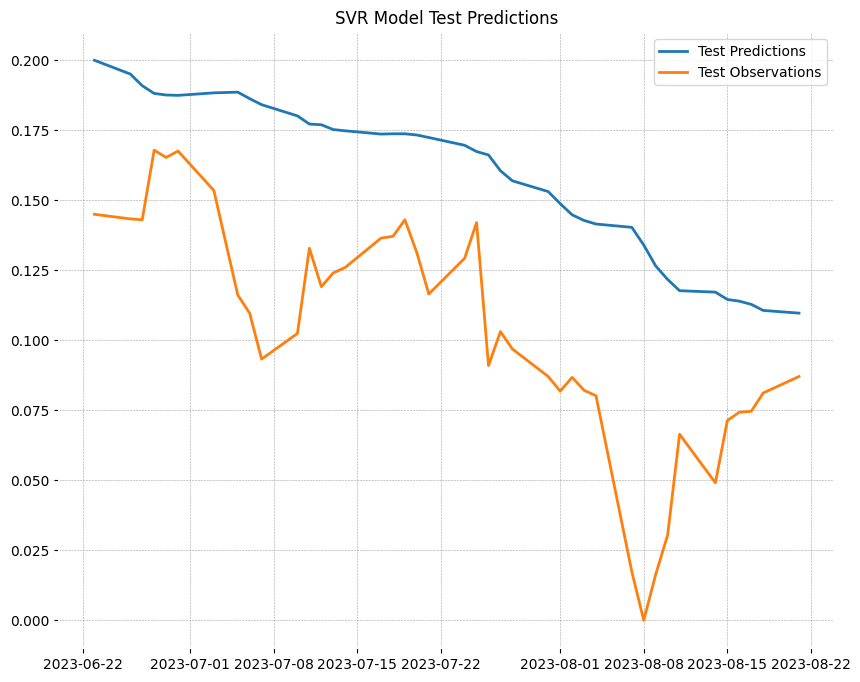

SVR Test Performance:
MSE: 0.0038129175406547517
RMSE: 0.06174882622896367
MAE: 0.0560059115965607



In [50]:
# Test predictions and evaluation without inverse transforming
test_predictions_svr = best_svr.predict(X_test)

# Plotting testing data directly using scaled values
plt.figure(figsize=(10, 8))
plt.plot(dates_test, test_predictions_svr)
plt.plot(dates_test, y_test)
plt.legend(['Test Predictions', 'Test Observations'])
plt.title('SVR Model Test Predictions')
plt.show()

evaluate_performance(y_test, test_predictions_svr, "SVR Test")

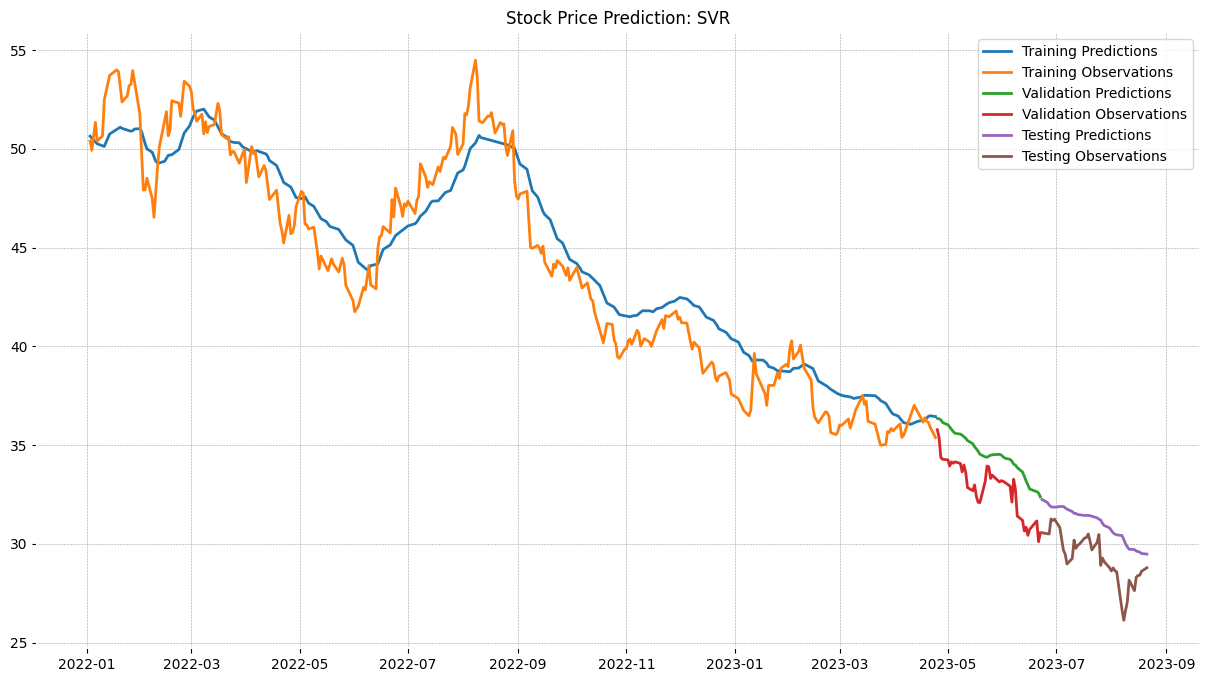

In [51]:
# Plotting all predictions and observations
plt.figure(figsize=(15, 8))
plt.plot(dates_train, train_svr_inv, label='Training Predictions')
plt.plot(dates_train, y_train_svr_inv, label='Training Observations')
plt.plot(dates_val, val_svr_inv, label='Validation Predictions')
plt.plot(dates_val, y_val_svr_inv, label='Validation Observations')
plt.plot(dates_test, test_svr_inv, label='Testing Predictions')
plt.plot(dates_test, y_test_svr_inv, label='Testing Observations')
plt.title('Stock Price Prediction: SVR')
plt.legend()
plt.show()

## Summary Comparision

ARIMA Performance:
MSE: 25.677889697225343
RMSE: 5.067335561932459
MAE: 4.991460472074112

SVR Performance:
MSE: 3.5609361607871843
RMSE: 1.8870442922165829
MAE: 1.7115408964532983

LSTM Performance:
MSE: 1.0640102624893188
RMSE: 1.0315086841583252
MAE: 0.7618635296821594



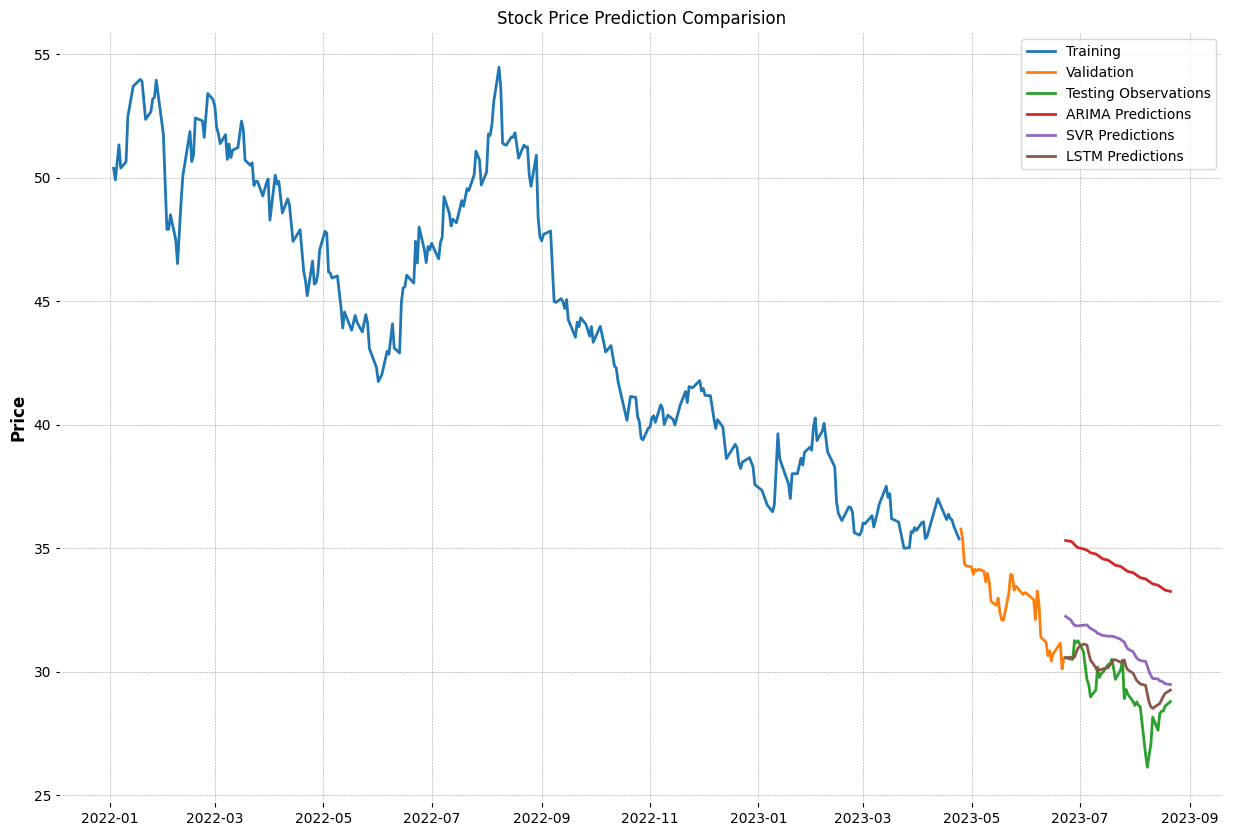

In [52]:
evaluate_performance(y_test_arima_inv, test_arima_inv, "ARIMA")
evaluate_performance(y_test_svr_inv, test_svr_inv, "SVR")
evaluate_performance(y_test_inv, test_predictions_inv, "LSTM")

plt.figure(figsize=(15, 10))
plt.plot(dates_train, y_train_inv, label='Training')
plt.plot(dates_val, y_val_inv, label='Validation')
plt.plot(dates_test, y_test_inv, label='Testing Observations')
plt.plot(dates_test, test_arima_inv, label='ARIMA Predictions')
plt.plot(dates_test, test_svr_inv, label='SVR Predictions')
plt.plot(dates_test, test_predictions_inv, label='LSTM Predictions')

plt.title('Stock Price Prediction Comparision')
plt.legend()
plt.ylabel('Price')
plt.show()

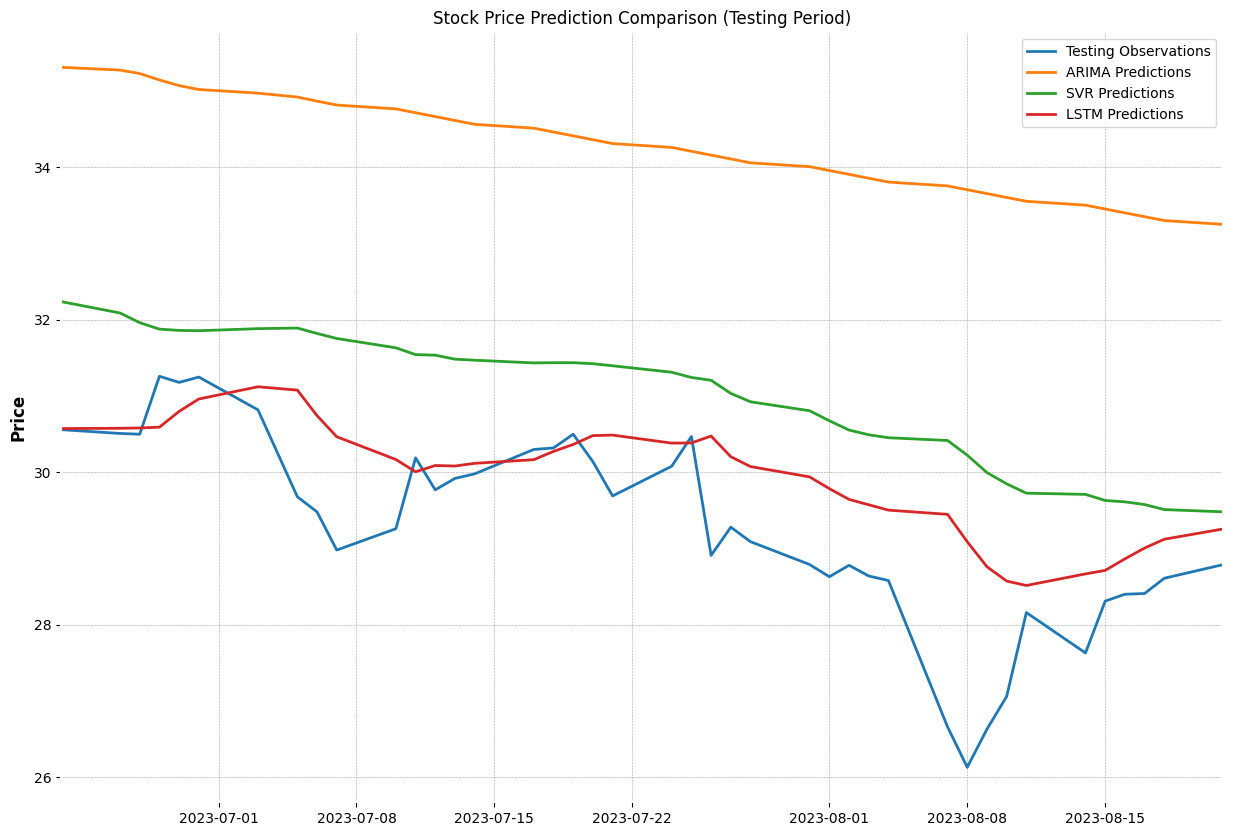

In [53]:
# Plot the predictions focusing on the testing period
plt.figure(figsize=(15, 10))
plt.plot(dates_test, y_test_inv, label='Testing Observations')
plt.plot(dates_test, test_arima_inv, label='ARIMA Predictions')
plt.plot(dates_test, test_svr_inv, label='SVR Predictions')
plt.plot(dates_test, test_predictions_inv, label='LSTM Predictions')

plt.title('Stock Price Prediction Comparison (Testing Period)')
plt.legend()
plt.ylabel('Price')

# Set x-axis limits to focus on the testing period
plt.xlim(dates_test[0], dates_test[-1])

plt.show()

# Prediction with Return(RET)

In [54]:
df_ret = df[['RET']]
df_ret.head(10)

RET
date                
2022-01-03 -0.040643
2022-01-04 -0.037423
2022-01-05  0.020172
2022-01-06 -0.014201
2022-01-07  0.016047
2022-01-10  0.009332
2022-01-11  0.008001
2022-01-12 -0.000706
2022-01-13 -0.019594
2022-01-14 -0.010623

In [55]:
# Normalize the data
scaler_ret = MinMaxScaler(feature_range=(0, 1))
df_scaled_ret = pd.DataFrame(scaler_ret.fit_transform(df_ret), columns=df_ret.columns, index=df_ret.index)

In [56]:
time_step_r = 90 #Adjust as needed for actural data
# dates_r, X_r, y_r = window_dataset(df_scaled_ret, '2022-01-03', '2023-12-29', target_col='RET', time_step=time_step)
dates_r, X_r, y_r = window_dataset(df_scaled_ret, '2022-01-03', '2023-12-29', target_col='RET', time_step=time_step_r)
print("Dates:", dates_r.shape)
print("X shape:", X_r.shape)
print("y shape:", y_r.shape)

Dates: (410,)
X shape: (410, 90, 1)
y shape: (410,)


In [57]:
# Split the dataset into training, validation, and test sets
dates_r_train, X_r_train, y_r_train = dates_r[:q_80], X_r[:q_80], y_r[:q_80]
dates_r_val, X_r_val, y_r_val = dates_r[q_80:q_90], X_r[q_80:q_90], y_r[q_80:q_90]
dates_r_test, X_r_test, y_r_test = dates_r[q_90:], X_r[q_90:], y_r[q_90:]


In [58]:
# Function to inverse transform predictions
def inverse_transform_predictions(predictions, original_data, scaler):
    dummy = np.zeros((predictions.shape[0], original_data.shape[1]))
    dummy[:, 0] = predictions
    inverse_transformed = scaler.inverse_transform(dummy)
    return inverse_transformed[:, 0]

## ARIMA Prediction

In [59]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")
# Define a function to fit ARIMA model and return performance metrics
def evaluate_arima_model(order):
    try:
        # Fit ARIMA model
        train_series = pd.Series(y_r_train, index=dates_r_train)
        model = ARIMA(train_series, order=order)
        model_fit = model.fit()

        # Forecasting beyond the training data
        n_forecast_val = len(dates_r_val)

        # Get forecast for validation set
        val_forecast = model_fit.get_forecast(steps=n_forecast_val)
        val_pred = val_forecast.predicted_mean

        # Inverse transform the predictions
        val_pred_inv = scaler.inverse_transform(val_pred.values.reshape(-1, 1)).flatten()
        y_val_inv = scaler.inverse_transform(y_r_val.reshape(-1, 1)).flatten()

        # Calculate MSE and MAE for validation set
        val_mse = mean_squared_error(y_val_inv, val_pred_inv)
        val_mae = mean_absolute_error(y_val_inv, val_pred_inv)

        return val_mse, val_mae
    except Exception as e:
        print(f"Error for order {order}: {e}")
        return float("inf"), float("inf")

# Grid search for ARIMA parameters
best_order = None
best_mse = float("inf")
best_mae = float("inf")

for p in range(6):
    for d in range(3):
        for q in range(6):
            order = (p, d, q)
            mse, mae = evaluate_arima_model(order)
            if mse < best_mse:
                best_mse = mse
                best_mae = mae
                best_order = order
            print(f'Order {order} - Validation MSE: {mse}, Validation MAE: {mae}')

print(f'Best order: {best_order} - Validation MSE: {best_mse}, Validation MAE: {best_mae}')


Order (0, 0, 0) - Validation MSE: 16.495933906282353, Validation MAE: 3.0750869570792454
Order (0, 0, 1) - Validation MSE: 16.543941662551518, Validation MAE: 3.0826720239123317
Order (0, 0, 2) - Validation MSE: 16.55170745960242, Validation MAE: 3.0846780696556357
Order (0, 0, 3) - Validation MSE: 16.55975684473838, Validation MAE: 3.085420498064698
Order (0, 0, 4) - Validation MSE: 16.55392595607338, Validation MAE: 3.084280147632311
Order (0, 0, 5) - Validation MSE: 16.525122841143347, Validation MAE: 3.0801308067848234
Order (0, 1, 0) - Validation MSE: 23.79792845526693, Validation MAE: 3.873785717196582
Order (0, 1, 1) - Validation MSE: 16.49588903475041, Validation MAE: 3.0750781311684965
Order (0, 1, 2) - Validation MSE: 16.545528465897743, Validation MAE: 3.0829062883393465
Order (0, 1, 3) - Validation MSE: 16.552737727093202, Validation MAE: 3.0848083524827468
Order (0, 1, 4) - Validation MSE: 16.556647157302514, Validation MAE: 3.085166971117883
Order (0, 1, 5) - Validation M

In [60]:
# Fit the best ARIMA model on the entire training data
train_series = pd.Series(y_r_train, index=dates_r_train)
best_model = ARIMA(train_series, order=best_order)
best_model_fit = best_model.fit()

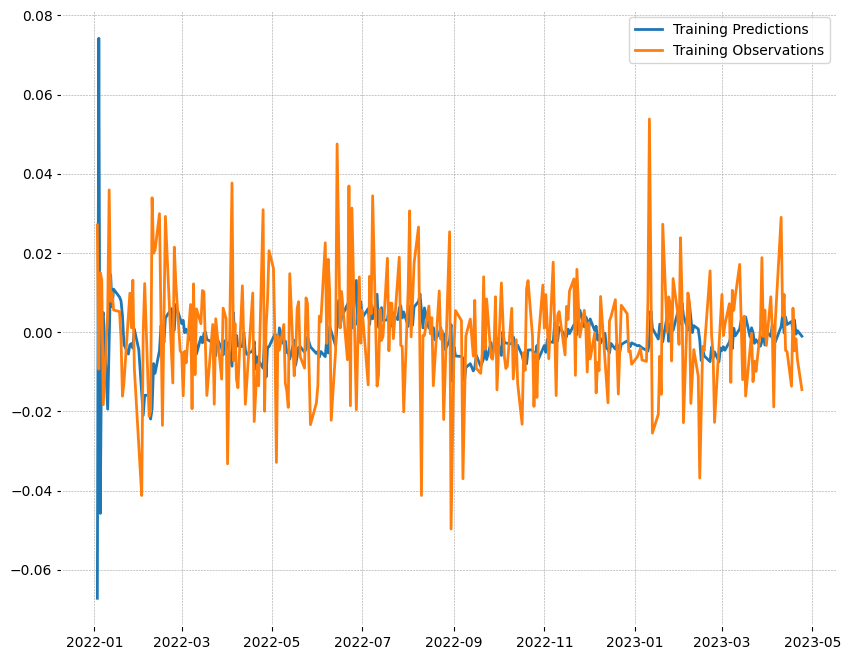

ARIMA Training Performance:
MSE: 0.0002860591481509445
RMSE: 0.01691328318662419
MAE: 0.012076738231041433



In [61]:
# Predicting and inverse transforming for training data
train_predictions_arima_ret = best_model_fit.predict(start=0, end=len(dates_r_train)-1, typ='levels')
train_predictions_inv_arima_ret = inverse_transform_predictions(train_predictions_arima_ret.values, df_scaled_ret, scaler_ret)
y_train_inv_arima_ret = inverse_transform_predictions(y_r_train, df_scaled_ret, scaler_ret)

# Plotting training data
plt.figure(figsize=(10, 8))
plt.plot(dates_r_train, train_predictions_inv_arima_ret)
plt.plot(dates_r_train, y_train_inv_arima_ret)
plt.legend(['Training Predictions', 'Training Observations'])
plt.show()

# Calculate performance values for training data
evaluate_performance(y_train_inv_arima_ret, train_predictions_inv_arima_ret, "ARIMA Training")

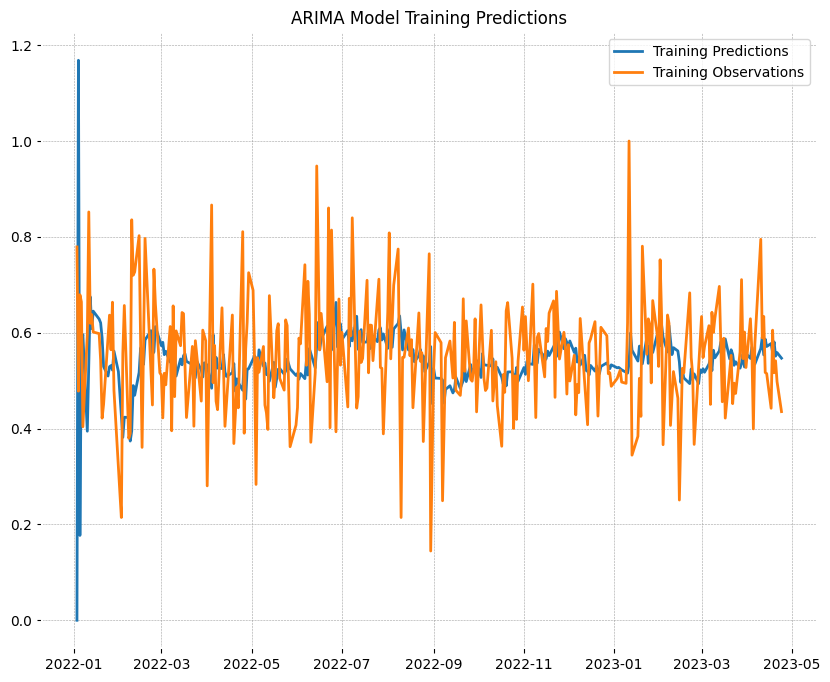

ARIMA Training Performance:
MSE: 0.019529185375313163
RMSE: 0.13974686177268225
MAE: 0.09978466330965921



In [62]:
# Predicting for training data without inverse transforming
train_predictions_arima_ret = best_model_fit.predict(start=0, end=len(dates_r_train)-1, typ='levels')

# Plotting training data directly using scaled values
plt.figure(figsize=(10, 8))
plt.plot(dates_r_train, train_predictions_arima_ret.values)
plt.plot(dates_r_train, y_r_train)
plt.legend(['Training Predictions', 'Training Observations'])
plt.title('ARIMA Model Training Predictions')
plt.show()

# Calculate performance values for training data using scaled values
evaluate_performance(y_r_train, train_predictions_arima_ret.values, "ARIMA Training")


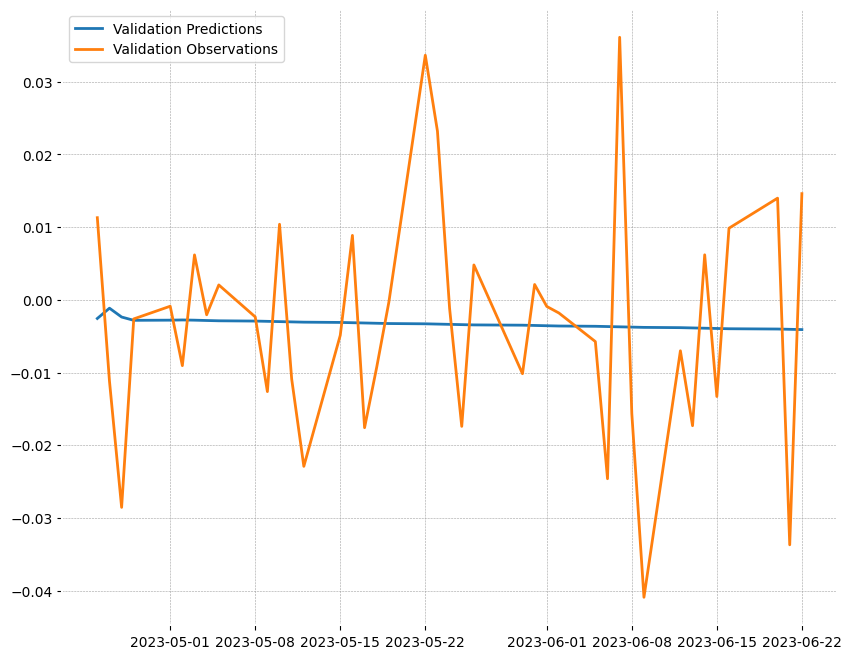

ARIMA Validation Performance:
MSE: 0.00025257141263979206
RMSE: 0.01589249548182387
MAE: 0.012061742234135106



In [63]:
# Validation predictions and evaluation
val_forecast_ret = best_model_fit.get_forecast(steps=len(dates_r_val))
val_predictions_arima_ret = val_forecast_ret.predicted_mean
val_predictions_inv_arima_ret = inverse_transform_predictions(val_predictions_arima_ret.values, df_scaled_ret, scaler_ret)
y_val_inv_arima_ret = inverse_transform_predictions(y_r_val, df_scaled_ret, scaler_ret)

# Plotting validation data
plt.figure(figsize=(10, 8))
plt.plot(dates_r_val, val_predictions_inv_arima_ret)
plt.plot(dates_r_val, y_val_inv_arima_ret)
plt.legend(['Validation Predictions', 'Validation Observations'])
plt.show()

# Calculate performance values for validation data
evaluate_performance(y_val_inv_arima_ret, val_predictions_inv_arima_ret, "ARIMA Validation")


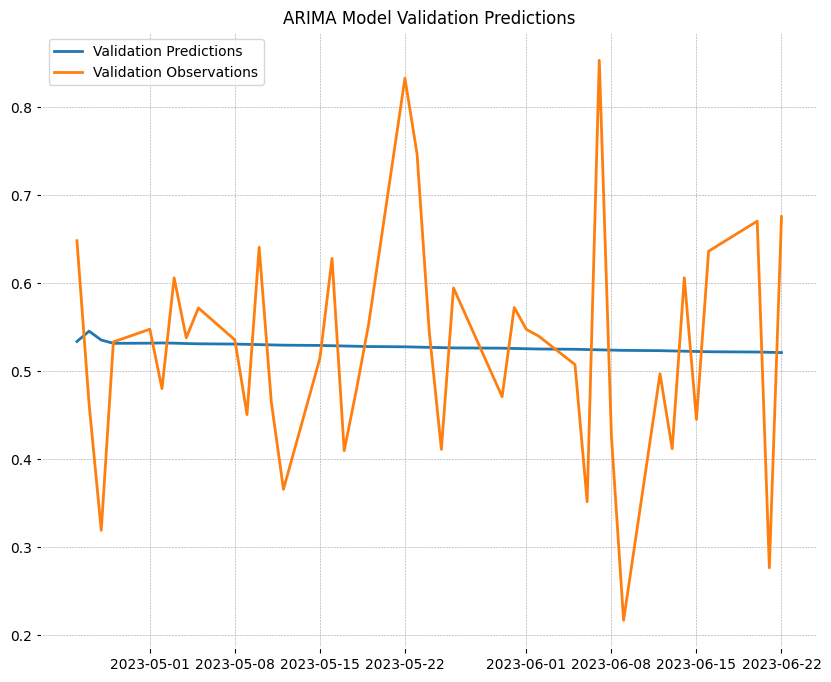

ARIMA Validation Performance:
MSE: 0.017242986179013865
RMSE: 0.1313125514907614
MAE: 0.0996607581232038



In [64]:
# Validation predictions and evaluation without inverse transforming
val_forecast_ret = best_model_fit.get_forecast(steps=len(dates_r_val))
val_predictions_arima_ret = val_forecast_ret.predicted_mean

# Plotting validation data directly using scaled values
plt.figure(figsize=(10, 8))
plt.plot(dates_r_val, val_predictions_arima_ret.values)
plt.plot(dates_r_val, y_r_val)
plt.legend(['Validation Predictions', 'Validation Observations'])
plt.title('ARIMA Model Validation Predictions')
plt.show()

# Calculate performance values for validation data using scaled values
evaluate_performance(y_r_val, val_predictions_arima_ret.values, "ARIMA Validation")

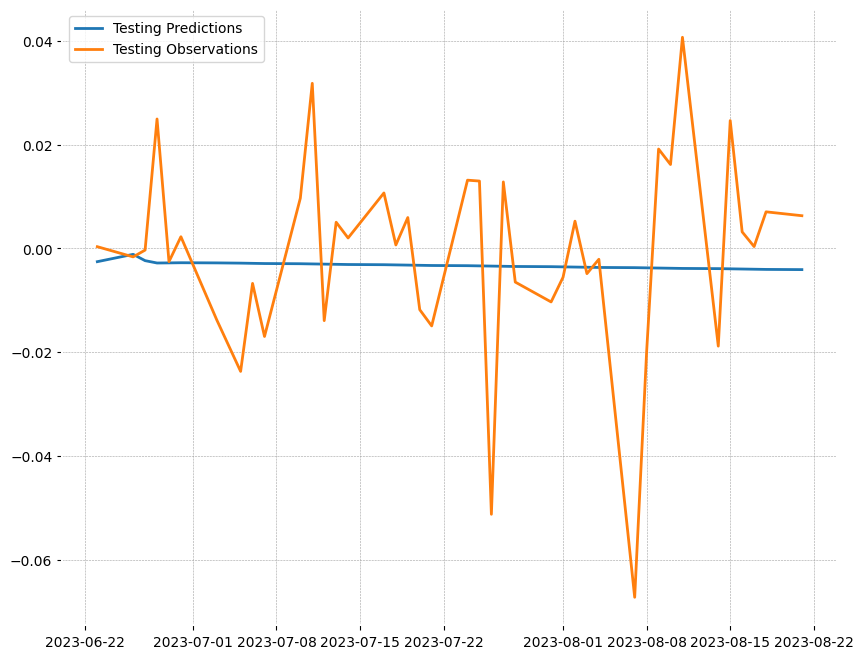

ARIMA Test Performance:
MSE: 0.000375858253662103
RMSE: 0.019387064080517786
MAE: 0.013910300864338412



In [65]:
# Test predictions and evaluation
test_forecast_ret = best_model_fit.get_forecast(steps=len(dates_r_test))
test_predictions_arima_ret = test_forecast_ret.predicted_mean
test_predictions_inv_arima_ret = inverse_transform_predictions(test_predictions_arima_ret.values, df_scaled_ret, scaler_ret)
y_test_inv_arima_ret = inverse_transform_predictions(y_r_test, df_scaled_ret, scaler_ret)

# Plotting test data
plt.figure(figsize=(10, 8))
plt.plot(dates_r_test, test_predictions_inv_arima_ret)
plt.plot(dates_r_test, y_test_inv_arima_ret)
plt.legend(['Testing Predictions', 'Testing Observations'])
plt.show()

# Calculate performance values for test data
evaluate_performance(y_test_inv_arima_ret, test_predictions_inv_arima_ret, "ARIMA Test")

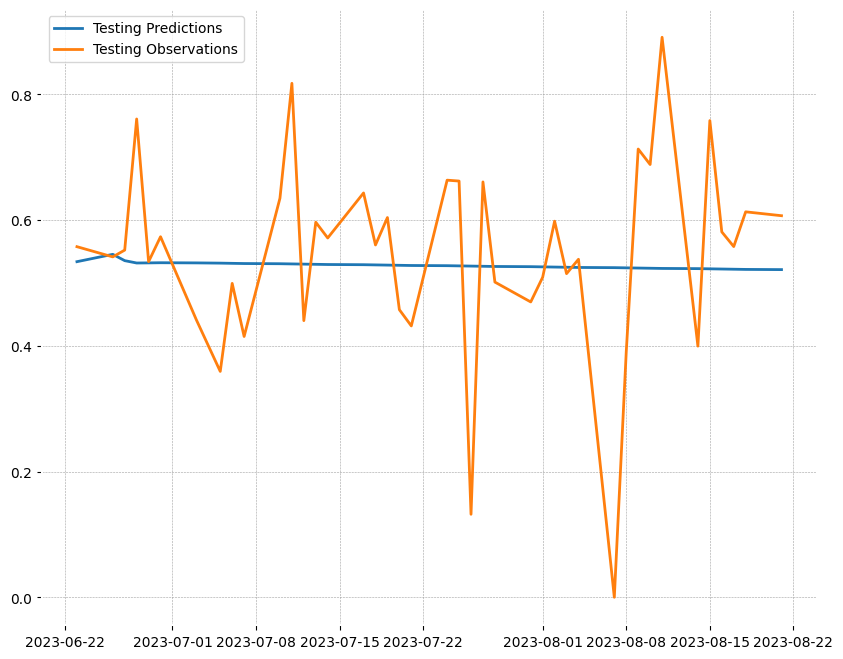

ARIMA Test Performance:
MSE: 0.02565974749647053
RMSE: 0.16018660211288124
MAE: 0.11493456773918775



In [66]:
# Test predictions and evaluation without inverse transforming
test_forecast_ret = best_model_fit.get_forecast(steps=len(dates_r_test))
test_predictions_arima_ret = test_forecast_ret.predicted_mean

# Plotting test data
plt.figure(figsize=(10, 8))
plt.plot(dates_r_test, test_predictions_arima_ret.values)
plt.plot(dates_r_test, y_r_test)
plt.legend(['Testing Predictions', 'Testing Observations'])
plt.show()

# Calculate performance values for test data
evaluate_performance(y_r_test, test_predictions_arima_ret.values, "ARIMA Test")

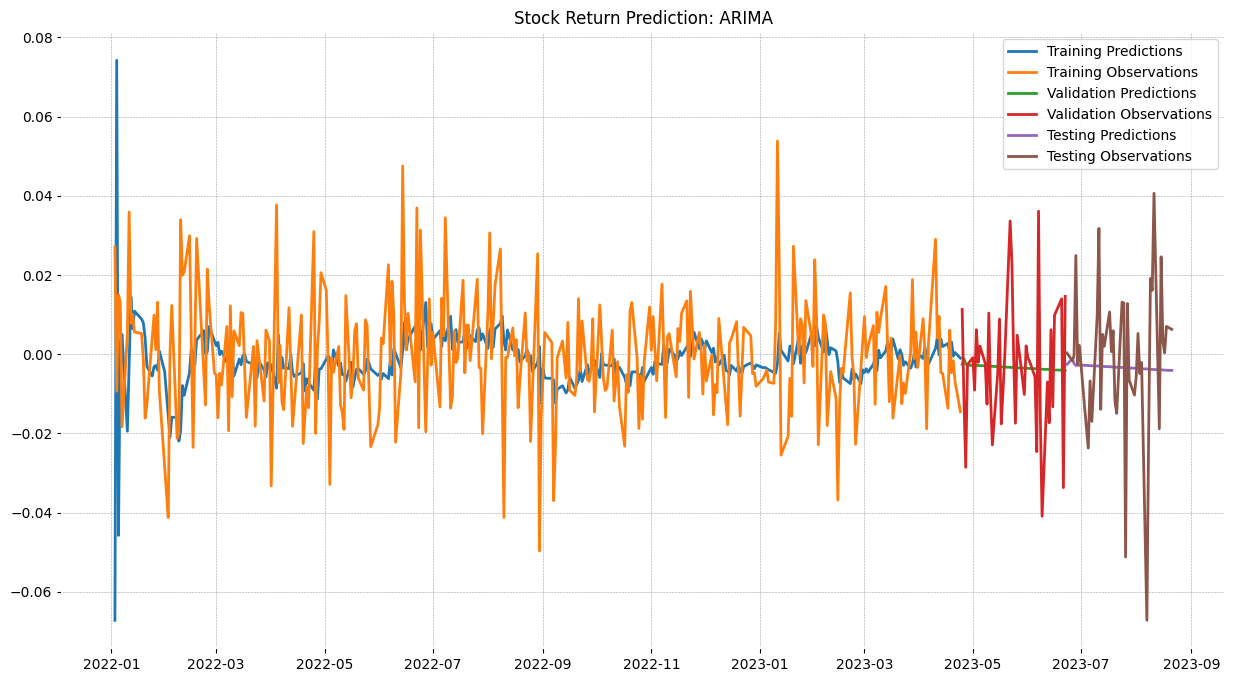

In [67]:
# Plotting all predictions and observations
plt.figure(figsize=(15, 8))
plt.plot(dates_r_train, train_predictions_inv_arima_ret, label='Training Predictions')
plt.plot(dates_r_train, y_train_inv_arima_ret, label='Training Observations')
plt.plot(dates_r_val, val_predictions_inv_arima_ret, label='Validation Predictions')
plt.plot(dates_r_val, y_val_inv_arima_ret, label='Validation Observations')
plt.plot(dates_r_test, test_predictions_inv_arima_ret, label='Testing Predictions')
plt.plot(dates_r_test, y_test_inv_arima_ret, label='Testing Observations')
plt.title('Stock Return Prediction: ARIMA')
plt.legend()
plt.show()

## LSTM Prediction

In [68]:
model_r = Sequential([layers.Input((time_step_r, X_r_train.shape[2])),
            layers.LSTM(256),
            layers.Dense(128, activation='relu'),
            layers.Dense(128, activation='relu'),
            layers.Dense(1)
          ])
model_r.compile(loss='mse', optimizer=Adam(learning_rate=0.001), metrics=['mean_absolute_error'])

model_r.fit(X_r_train, y_r_train, validation_data=(X_r_val, y_r_val), epochs=100)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 351ms/step - loss: 0.1706 - mean_absolute_error: 0.3653 - val_loss: 0.0677 - val_mean_absolute_error: 0.2288
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 203ms/step - loss: 0.0542 - mean_absolute_error: 0.2035 - val_loss: 0.0278 - val_mean_absolute_error: 0.1362
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 205ms/step - loss: 0.0193 - mean_absolute_error: 0.1085 - val_loss: 0.0206 - val_mean_absolute_error: 0.1111
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 207ms/step - loss: 0.0176 - mean_absolute_error: 0.0999 - val_loss: 0.0192 - val_mean_absolute_error: 0.1064
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 330ms/step - loss: 0.0179 - mean_absolute_error: 0.0993 - val_loss: 0.0188 - val_mean_absolute_error: 0.1046
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 205ms/step - loss: 0.0171 - mean_absolute_error: 0.0968 - val_loss: 0.0188 - val_mean_absolute_error: 0.1050
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 207ms/step - loss: 0.0158 - mean_absolute_error: 0.0

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step


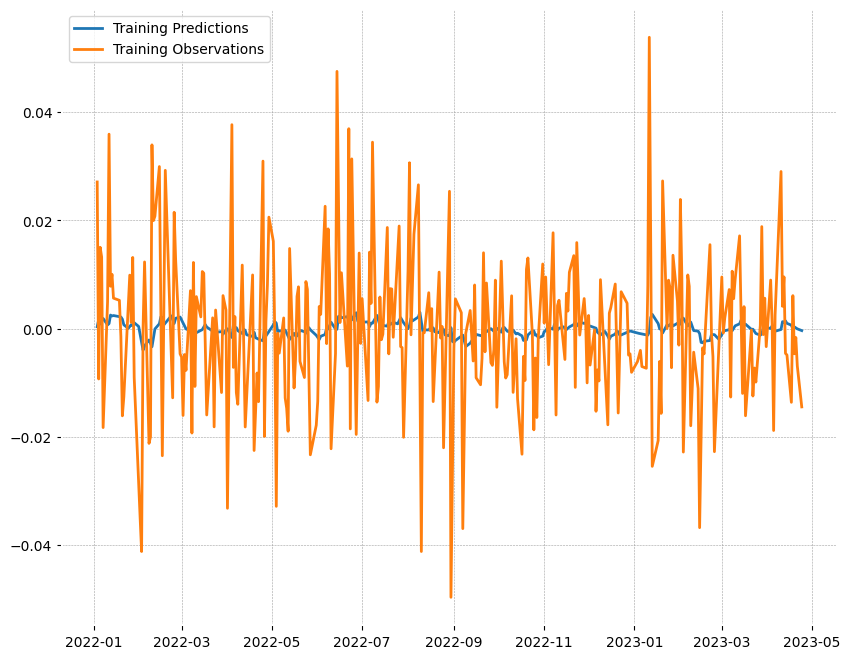

LSTM Training Performance:
MSE: 0.00021051357426102668
RMSE: 0.01450908592093336
MAE: 0.011081575494321198



In [69]:
# Predicting and inverse transforming for training data
train_predictions_ret = model_r.predict(X_r_train).flatten()
train_predictions_inv_ret = inverse_transform_predictions(train_predictions_ret, df_scaled_ret, scaler_ret)
y_train_inv_ret = inverse_transform_predictions(y_r_train, df_scaled_ret, scaler_ret)

# Plotting training data
plt.figure(figsize=(10, 8))
plt.plot(dates_r_train, train_predictions_inv_ret)
plt.plot(dates_r_train, y_train_inv_ret)
plt.legend(['Training Predictions', 'Training Observations'])
plt.show()

# Calculate performance values for training data
evaluate_performance(y_train_inv_ret, train_predictions_inv_ret, "LSTM Training")

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step


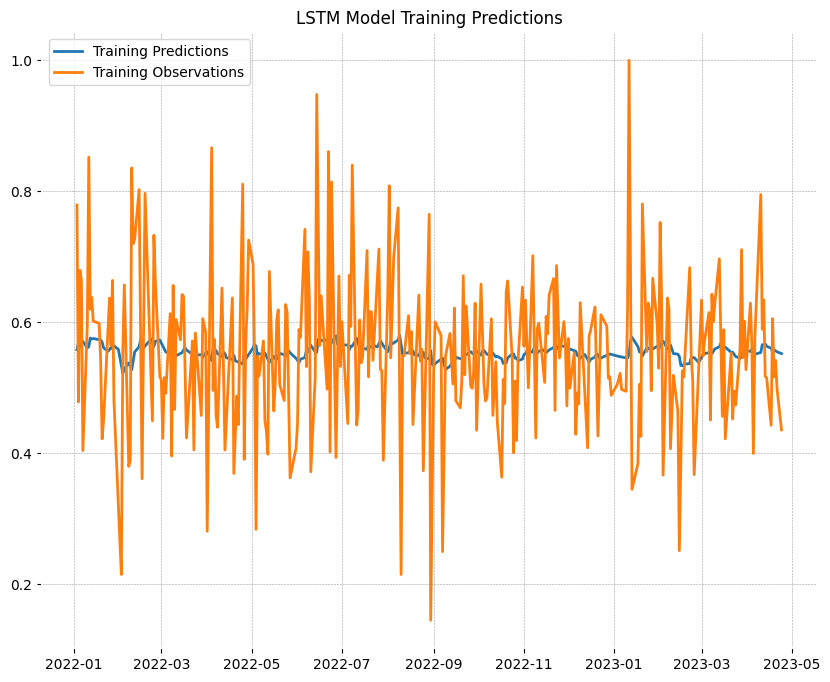

LSTM Training Performance:
MSE: 0.01437170896679163
RMSE: 0.11988206207752228
MAE: 0.09156207740306854



In [70]:
# Predicting for training data without inverse transforming
train_predictions_ret = model_r.predict(X_r_train).flatten()

# Plotting training data directly using scaled values
plt.figure(figsize=(10, 8))
plt.plot(dates_r_train, train_predictions_ret)
plt.plot(dates_r_train, y_r_train)
plt.legend(['Training Predictions', 'Training Observations'])
plt.title('LSTM Model Training Predictions')
plt.show()

# Calculate performance values for training data using scaled values
evaluate_performance(y_r_train, train_predictions_ret, "LSTM Training")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


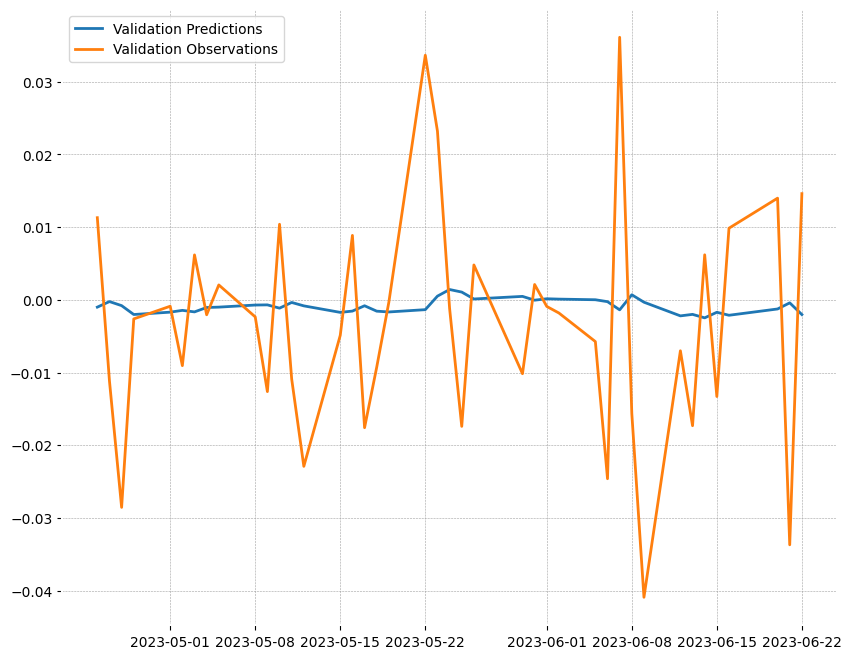

LSTM Validation Performance:
MSE: 0.000266284310570043
RMSE: 0.01631822020227828
MAE: 0.012446697203511142



In [71]:
# Predicting and inverse transforming for validation data
val_predictions_ret = model_r.predict(X_r_val).flatten()
val_predictions_inv_ret = inverse_transform_predictions(val_predictions_ret, df_scaled_ret, scaler_ret)
y_val_inv_ret = inverse_transform_predictions(y_r_val, df_scaled_ret, scaler_ret)

# Plotting training data
plt.figure(figsize=(10, 8))
plt.plot(dates_r_val, val_predictions_inv_ret)
plt.plot(dates_r_val, y_val_inv_ret)
plt.legend(['Validation Predictions', 'Validation Observations'])
plt.show()

# Calculate performance values for training data
evaluate_performance(y_val_inv_ret, val_predictions_inv_ret, "LSTM Validation")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


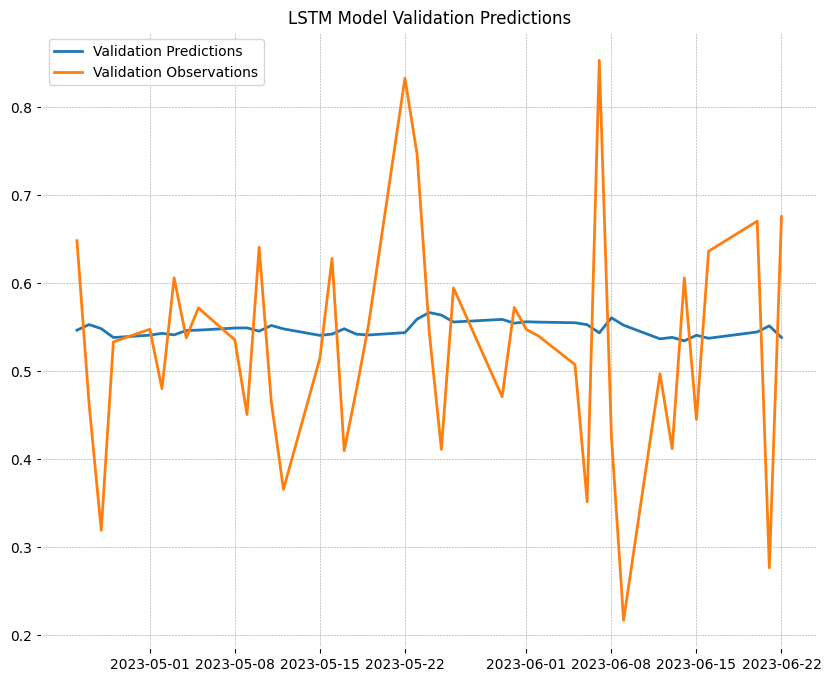

LSTM Validation Performance:
MSE: 0.018179161474108696
RMSE: 0.13483011722564697
MAE: 0.10284146666526794



In [72]:
# Predicting for validation data without inverse transforming
val_predictions_ret = model_r.predict(X_r_val).flatten()

# Plotting validation data directly using scaled values
plt.figure(figsize=(10, 8))
plt.plot(dates_r_val, val_predictions_ret)
plt.plot(dates_r_val, y_r_val)
plt.legend(['Validation Predictions', 'Validation Observations'])
plt.title('LSTM Model Validation Predictions')
plt.show()

# Calculate performance values for validation data using scaled values
evaluate_performance(y_r_val, val_predictions_ret, "LSTM Validation")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


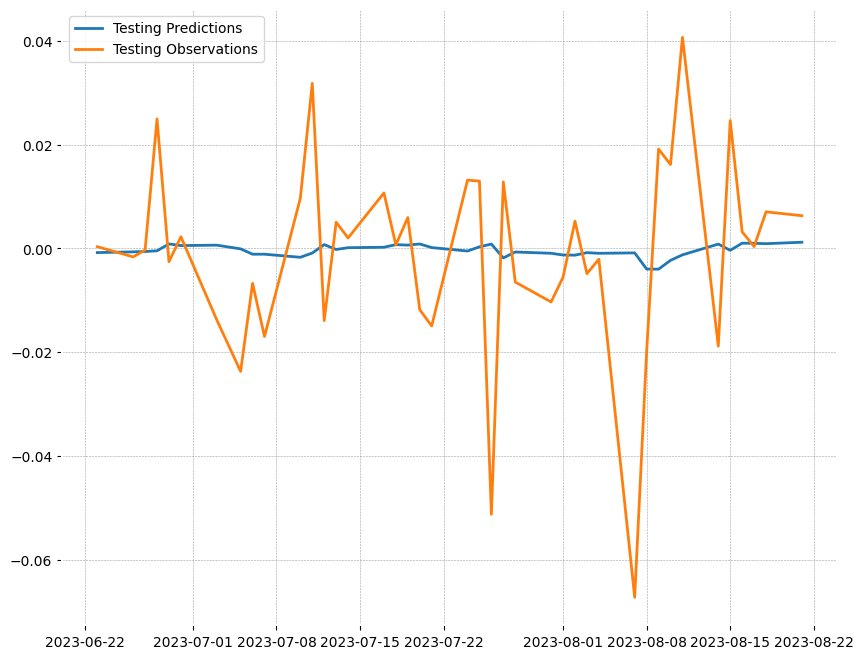

LSTM Testing Performance:
MSE: 0.0003781216213536268
RMSE: 0.01944534960739011
MAE: 0.013419859361459566



In [73]:
# Predicting and inverse transforming for testing data
test_predictions_ret = model_r.predict(X_r_test).flatten()
test_predictions_inv_ret = inverse_transform_predictions(test_predictions_ret, df_scaled_ret, scaler_ret)
y_test_inv_ret = inverse_transform_predictions(y_r_test, df_scaled_ret, scaler_ret)

# Plotting training data
plt.figure(figsize=(10, 8))
plt.plot(dates_r_test, test_predictions_inv_ret)
plt.plot(dates_r_test, y_test_inv_ret)
plt.legend(['Testing Predictions', 'Testing Observations'])
plt.show()

# Calculate performance values for training data
evaluate_performance(y_test_inv_ret, test_predictions_inv_ret, "LSTM Testing")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


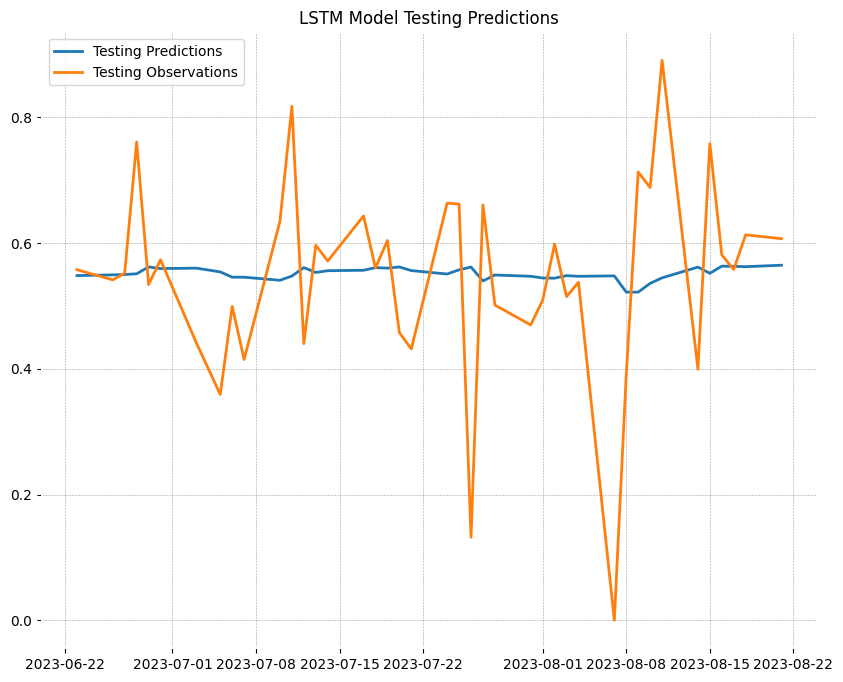

LSTM Testing Performance:
MSE: 0.02581426501274109
RMSE: 0.16066817939281464
MAE: 0.11088225990533829



In [74]:
# Predicting for testing data without inverse transforming
test_predictions_ret = model_r.predict(X_r_test).flatten()

# Plotting testing data directly using scaled values
plt.figure(figsize=(10, 8))
plt.plot(dates_r_test, test_predictions_ret)
plt.plot(dates_r_test, y_r_test)
plt.legend(['Testing Predictions', 'Testing Observations'])
plt.title('LSTM Model Testing Predictions')
plt.show()

# Calculate performance values for testing data using scaled values
evaluate_performance(y_r_test, test_predictions_ret, "LSTM Testing")


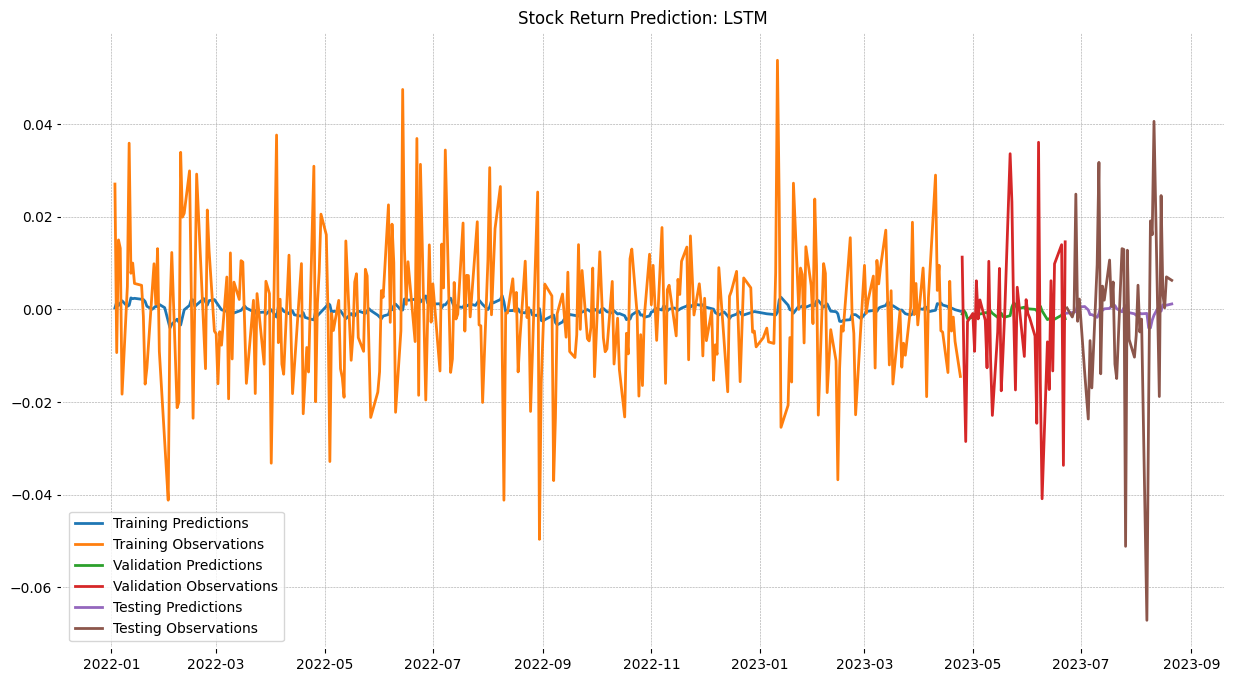

In [75]:
plt.figure(figsize=(15, 8))
plt.plot(dates_r_train, train_predictions_inv_ret, label='Training Predictions')
plt.plot(dates_r_train, y_train_inv_ret, label='Training Observations')
plt.plot(dates_r_val, val_predictions_inv_ret, label='Validation Predictions')
plt.plot(dates_r_val, y_val_inv_ret, label='Validation Observations')
plt.plot(dates_r_test, test_predictions_inv_ret, label='Testing Predictions')
plt.plot(dates_r_test, y_test_inv_ret, label='Testing Observations')
plt.title('Stock Return Prediction: LSTM')
plt.legend()
plt.show()


## SVR Prediction

In [76]:
# Combine train and validation sets for hyperparameter tuning
X_r_train_val = np.concatenate((X_r_train, X_r_val))
y_r_train_val = np.concatenate((y_r_train, y_r_val))

# Reshape for GridSearchCV
X_r_train_val_flat = X_r_train_val.reshape(X_r_train_val.shape[0], -1)
X_r_test_flat = X_r_test.reshape(X_r_test.shape[0], -1)

In [77]:
from sklearn.svm import SVR
# Define the SVR model
svr = SVR()

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'sigmoid']
}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_r_train_val_flat, y_r_train_val)

# Print the best parameters
best_params = grid_search.best_params_
print(f'Best parameters found: {best_params}')

# Train the SVR model using the best parameters
best_svr = grid_search.best_estimator_

Fitting 5 folds for each of 75 candidates, totalling 375 fits
Best parameters found: {'C': 1, 'gamma': 0.1, 'kernel': 'sigmoid'}


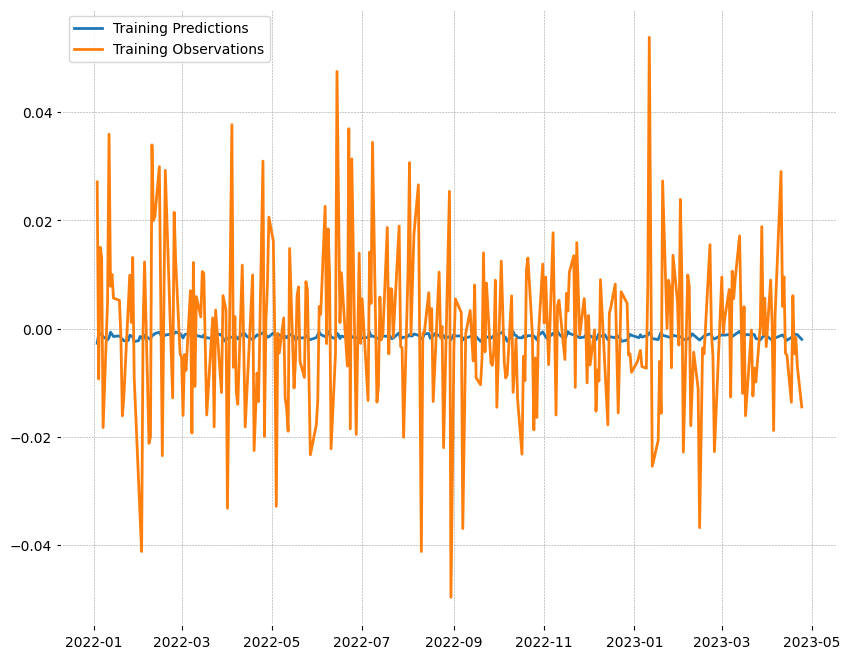

SVR Training Performance:
MSE: 0.00020634537730435508
RMSE: 0.014364726844056418
MAE: 0.010926421382596125



In [78]:
# Predicting and inverse transforming for training data
train_predictions_svr_ret = best_svr.predict(X_r_train.reshape(X_r_train.shape[0], -1))
train_predictions_inv_svr_ret = inverse_transform_predictions(train_predictions_svr_ret, df_scaled_ret, scaler_ret)
y_train_inv_svr_ret = inverse_transform_predictions(y_r_train, df_scaled_ret, scaler_ret)

# Plotting training data
plt.figure(figsize=(10, 8))
plt.plot(dates_r_train, train_predictions_inv_svr_ret)
plt.plot(dates_r_train, y_train_inv_svr_ret)
plt.legend(['Training Predictions', 'Training Observations'])
plt.show()

# Calculate performance values for training data
evaluate_performance(y_train_inv_svr_ret, train_predictions_inv_svr_ret, "SVR Training")

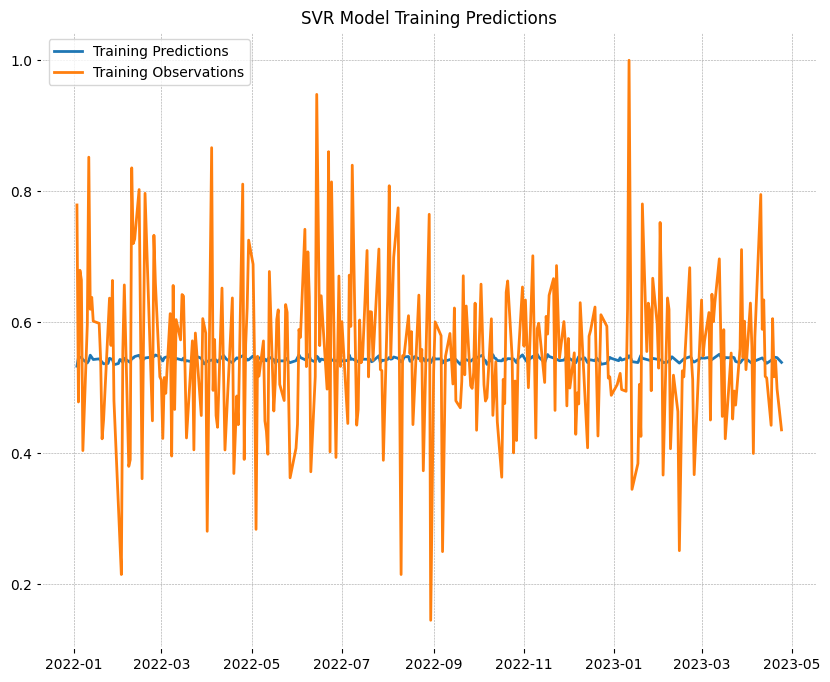

SVR Training Performance:
MSE: 0.01408714648968091
RMSE: 0.11868928548812192
MAE: 0.09028011189638865



In [79]:
# Predicting for training data without inverse transforming
train_predictions_svr_ret = best_svr.predict(X_r_train.reshape(X_r_train.shape[0], -1))

# Plotting training data directly using scaled values
plt.figure(figsize=(10, 8))
plt.plot(dates_r_train, train_predictions_svr_ret)
plt.plot(dates_r_train, y_r_train)
plt.legend(['Training Predictions', 'Training Observations'])
plt.title('SVR Model Training Predictions')
plt.show()

# Calculate performance values for training data using scaled values
evaluate_performance(y_r_train, train_predictions_svr_ret, "SVR Training")


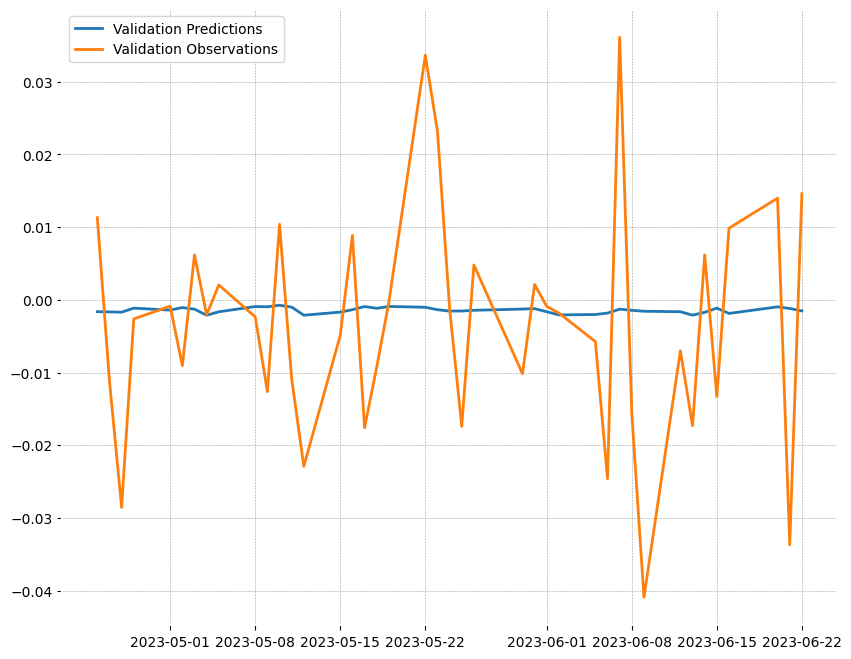

SVR Validation Performance:
MSE: 0.0002532686163476633
RMSE: 0.015914415363049418
MAE: 0.012014334784308132



In [80]:
# Validation predictions and evaluation
val_predictions_svr_ret = best_svr.predict(X_r_val.flatten().reshape(X_r_val.shape[0], -1))
val_predictions_inv_svr_ret = inverse_transform_predictions(val_predictions_svr_ret, df_scaled_ret, scaler_ret)
y_val_inv_svr_ret = inverse_transform_predictions(y_r_val, df_scaled_ret, scaler_ret)

# Plotting validation data
plt.figure(figsize=(10, 8))
plt.plot(dates_r_val, val_predictions_inv_svr_ret)
plt.plot(dates_r_val, y_val_inv_svr_ret)
plt.legend(['Validation Predictions', 'Validation Observations'])
plt.show()

# Calculate performance values for validation data
evaluate_performance(y_val_inv_svr_ret, val_predictions_inv_svr_ret, "SVR Validation")

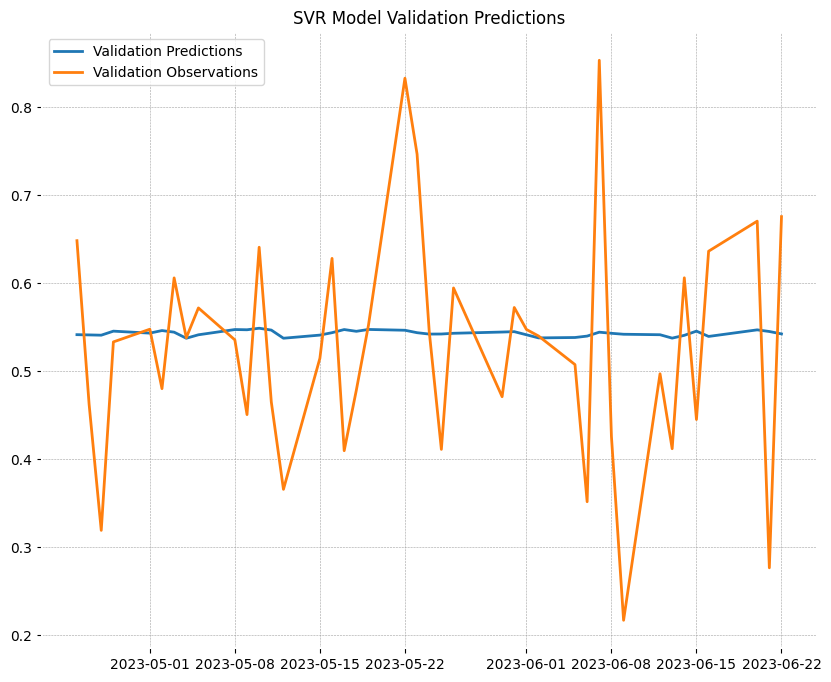

SVR Validation Performance:
MSE: 0.01729058409903629
RMSE: 0.1314936656232394
MAE: 0.09926905166001365



In [81]:
# Validation predictions and evaluation without inverse transforming
val_predictions_svr_ret = best_svr.predict(X_r_val.flatten().reshape(X_r_val.shape[0], -1))

# Plotting validation data directly using scaled values
plt.figure(figsize=(10, 8))
plt.plot(dates_r_val, val_predictions_svr_ret)
plt.plot(dates_r_val, y_r_val)
plt.legend(['Validation Predictions', 'Validation Observations'])
plt.title('SVR Model Validation Predictions')
plt.show()

# Calculate performance values for validation data using scaled values
evaluate_performance(y_r_val, val_predictions_svr_ret, "SVR Validation")

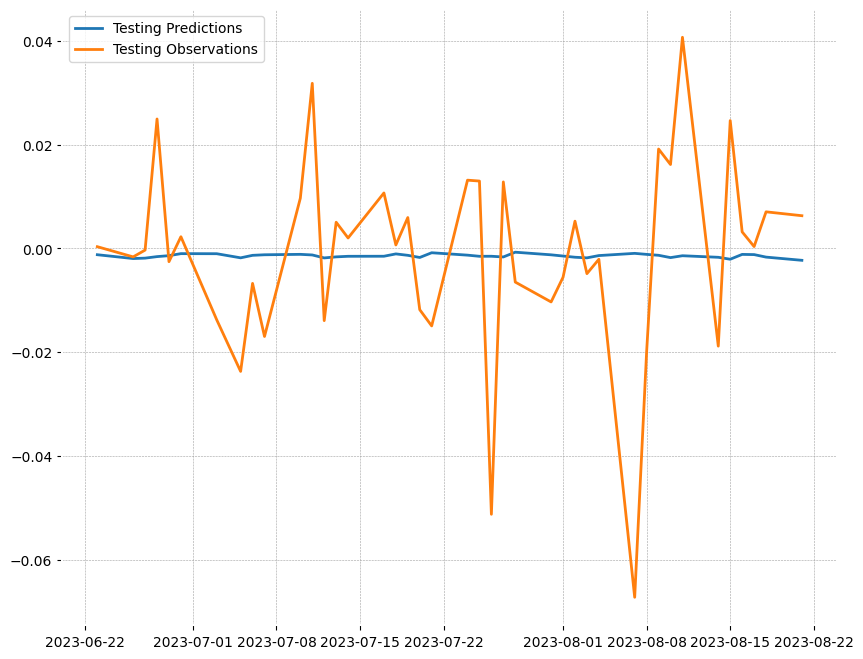

SVR Test Performance:
MSE: 0.0003721843599442591
RMSE: 0.019292080238902675
MAE: 0.01357530807958981



In [82]:
# Test predictions and evaluation
test_predictions_svr_ret = best_svr.predict((X_r_test.flatten().reshape(X_r_test.shape[0], -1)))
test_predictions_inv_svr_ret = inverse_transform_predictions(test_predictions_svr_ret, df_scaled_ret, scaler_ret)
y_test_inv_svr_ret = inverse_transform_predictions(y_r_test, df_scaled_ret, scaler_ret)

# Plotting test data
plt.figure(figsize=(10, 8))
plt.plot(dates_r_test, test_predictions_inv_svr_ret)
plt.plot(dates_r_test, y_test_inv_svr_ret)
plt.legend(['Testing Predictions', 'Testing Observations'])
plt.show()

# Calculate performance values for test data
evaluate_performance(y_test_inv_svr_ret, test_predictions_inv_svr_ret, "SVR Test")

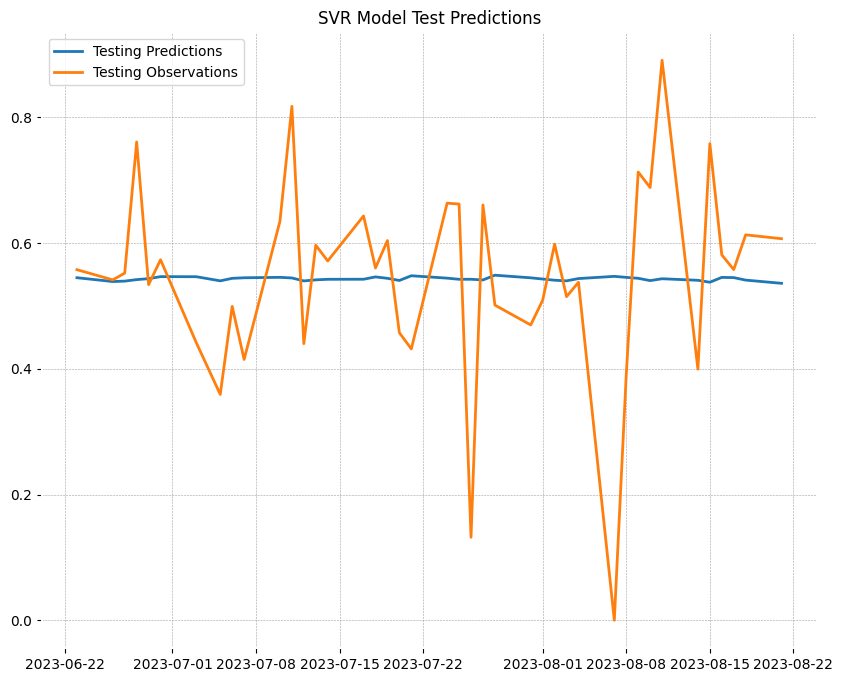

SVR Test Performance:
MSE: 0.02540893170564984
RMSE: 0.15940179329496215
MAE: 0.11216667283264875



In [83]:
# Test predictions and evaluation without inverse transforming
test_predictions_svr_ret = best_svr.predict(X_r_test.flatten().reshape(X_r_test.shape[0], -1))

# Plotting testing data directly using scaled values
plt.figure(figsize=(10, 8))
plt.plot(dates_r_test, test_predictions_svr_ret)
plt.plot(dates_r_test, y_r_test)
plt.legend(['Testing Predictions', 'Testing Observations'])
plt.title('SVR Model Test Predictions')
plt.show()

# Calculate performance values for testing data using scaled values
evaluate_performance(y_r_test, test_predictions_svr_ret, "SVR Test")

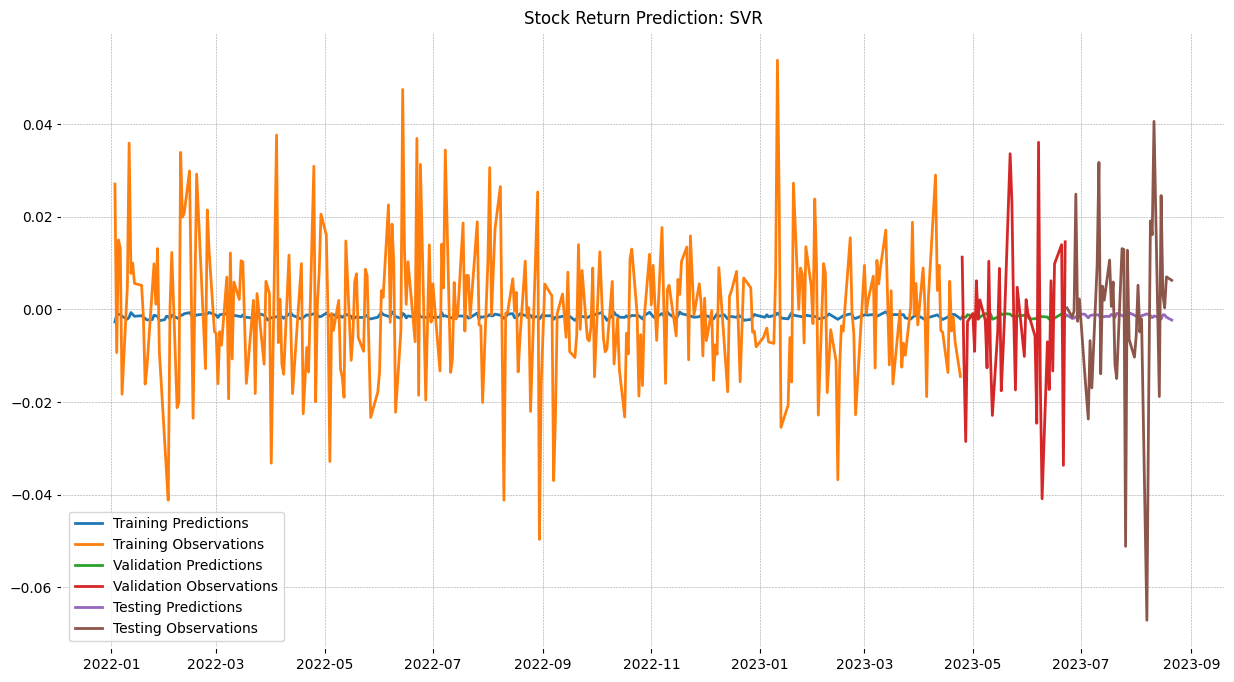

In [84]:
# Plotting all predictions and observations
plt.figure(figsize=(15, 8))
plt.plot(dates_r_train, train_predictions_inv_svr_ret, label='Training Predictions')
plt.plot(dates_r_train, y_train_inv_svr_ret, label='Training Observations')
plt.plot(dates_r_val, val_predictions_inv_svr_ret, label='Validation Predictions')
plt.plot(dates_r_val, y_val_inv_svr_ret, label='Validation Observations')
plt.plot(dates_r_test, test_predictions_inv_svr_ret, label='Testing Predictions')
plt.plot(dates_r_test, y_test_inv_svr_ret, label='Testing Observations')
plt.title('Stock Return Prediction: SVR')
plt.legend()
plt.show()

## Summary Comparision

ARIMA Performance:
MSE: 0.000375858253662103
RMSE: 0.019387064080517786
MAE: 0.013910300864338412

SVR Performance:
MSE: 0.0003721843599442591
RMSE: 0.019292080238902675
MAE: 0.01357530807958981

LSTM Performance:
MSE: 0.0003781216213536268
RMSE: 0.01944534960739011
MAE: 0.013419859361459566



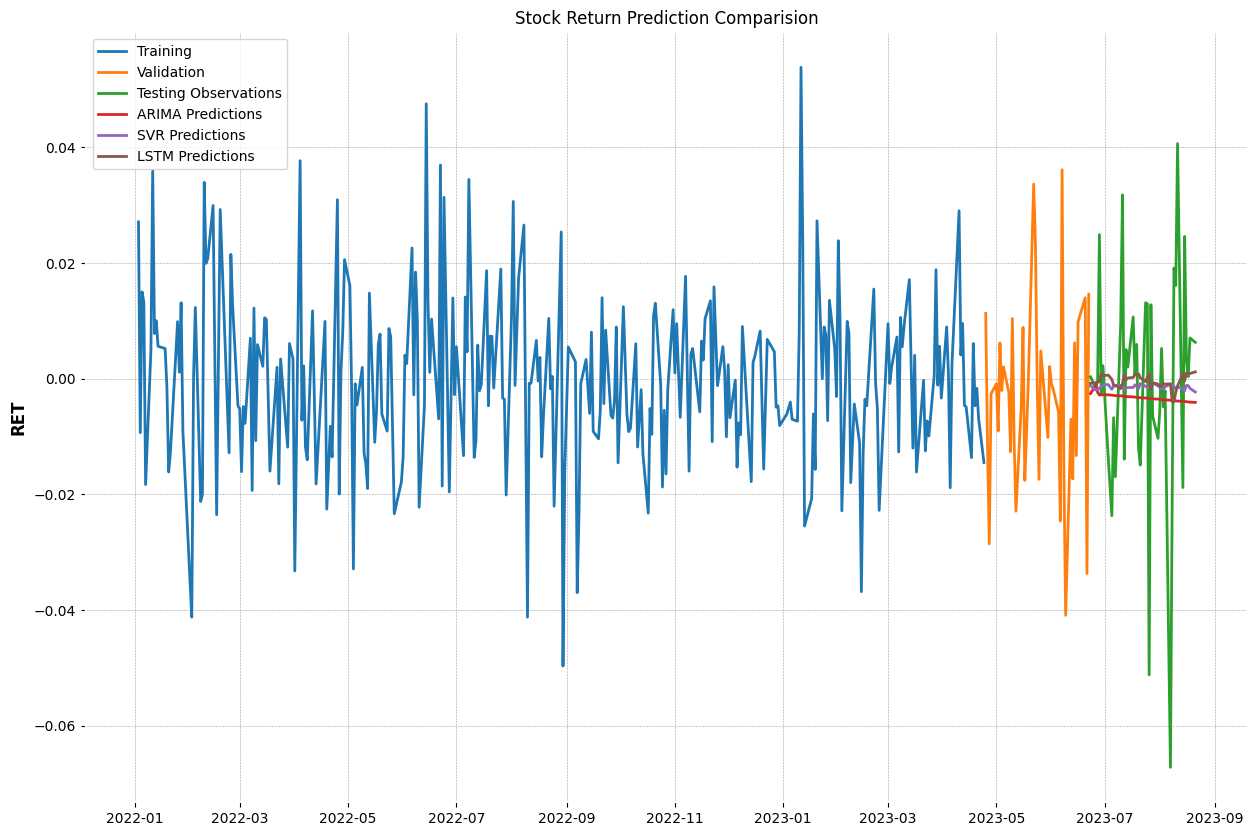

In [85]:
evaluate_performance(y_test_inv_arima_ret, test_predictions_inv_arima_ret, "ARIMA")
evaluate_performance(y_test_inv_svr_ret, test_predictions_inv_svr_ret, "SVR")
evaluate_performance(y_test_inv_ret, test_predictions_inv_ret, "LSTM")


plt.figure(figsize=(15, 10))
plt.plot(dates_r_train, y_train_inv_ret, label='Training')
plt.plot(dates_r_val, y_val_inv_ret, label='Validation')
plt.plot(dates_r_test, y_test_inv_ret, label='Testing Observations')
plt.plot(dates_r_test, test_predictions_inv_arima_ret, label='ARIMA Predictions')
plt.plot(dates_r_test, test_predictions_inv_svr_ret, label='SVR Predictions')
plt.plot(dates_r_test, test_predictions_inv_ret, label='LSTM Predictions')


plt.title('Stock Return Prediction Comparision')
plt.legend()
plt.ylabel('RET')
plt.show()

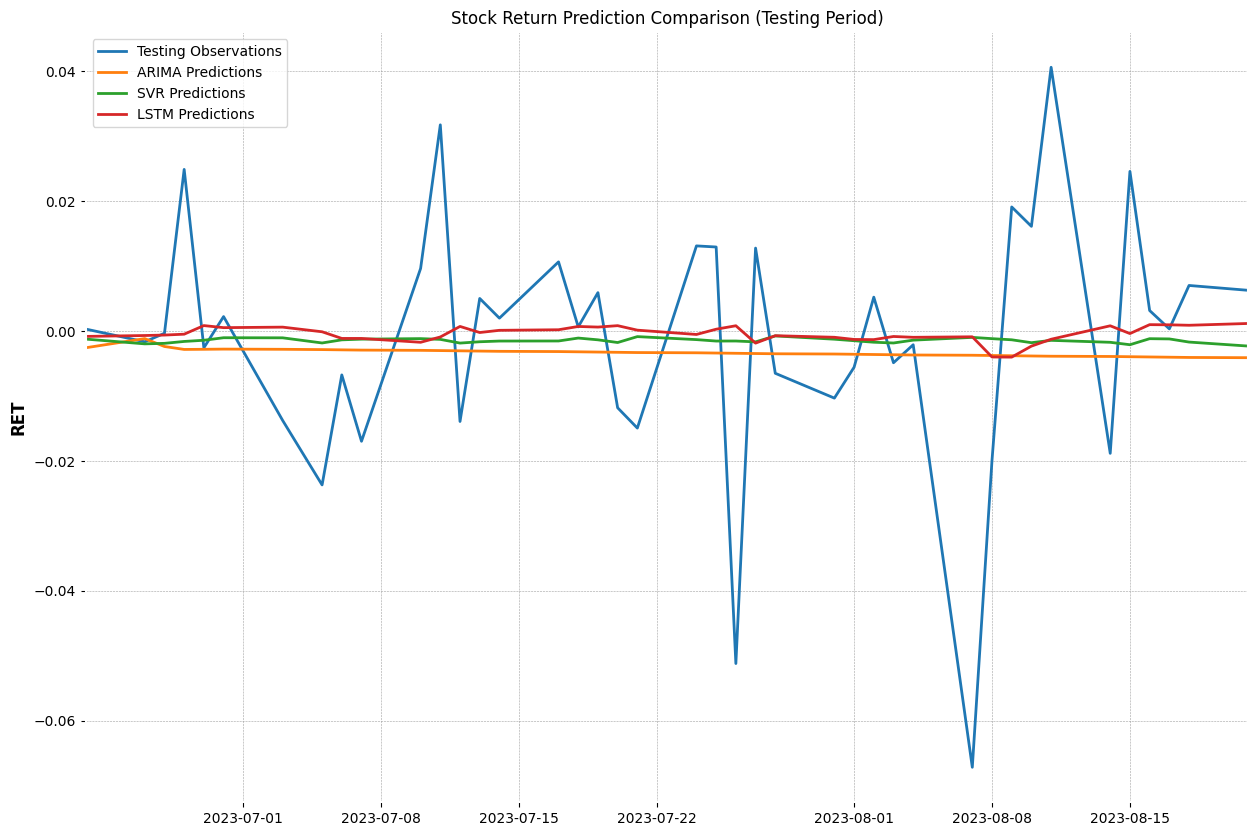

In [86]:
# Plot the predictions focusing on the testing period
plt.figure(figsize=(15, 10))
plt.plot(dates_r_test, y_test_inv_ret, label='Testing Observations')
plt.plot(dates_r_test, test_predictions_inv_arima_ret, label='ARIMA Predictions')
plt.plot(dates_r_test, test_predictions_inv_svr_ret, label='SVR Predictions')
plt.plot(dates_r_test, test_predictions_inv_ret, label='LSTM Predictions')

plt.title('Stock Return Prediction Comparison (Testing Period)')
plt.legend()
plt.ylabel('RET')

# Set x-axis limits to focus on the testing period
plt.xlim(dates_test[0], dates_test[-1])

plt.show()